<a href="https://colab.research.google.com/github/thesalmonification/DSCI400_Revamp/blob/master/Wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [0]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Visualize the discrete valued wavelets

print(pywt.wavelist(kind = 'discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


**Plot the Discrete Wavelet Transforms**

In [0]:
def plot_dwts(limited, n = 100):
  """
  This function loads the EEG data, performs the discrete wavelet transform on
  each vector, and plots the low-frequency coefficients and the high-frequency
  coefficients on different subplots.

  The only input is limited, which is a user-input boolean determining whether
  to see only the first n coefficients for each transform vector. 
  """

  for i in range(2,12,2):
    try:
      df = pd.read_hdf('/content/drive/Shared drives/DSCI400_Revamp/Waveform_Vocoded_Equalized_Data.h5', 't' + str(i)).transpose()
    except:
      continue
    num_rows = df.count()[0]
    vals = np.array(df.index)
    for j in range(num_rows):

     #Perform the discrete wavelet transform and visualize the output transform vectors
      vector = df.iloc[j,:].to_numpy()
      (ca, cd) = pywt.dwt(vector, 'db10')
      print("ca", ca)
      print("cd", cd)

      #Generate subplots
      fig, ax = plt.subplots(2)

      if not limited:
        ax[0].scatter(range(len(ca)), abs(ca), s = 0.3, c = ['b'], label = 'ca') #To see all the coefficients
        ax[0].set(xlabel = 'Index', ylabel = 'Value')
        ax[1].scatter(range(len(cd)), abs(cd), s = 0.3, c = ['r'], label = 'cd') #To see all the coefficients
        ax[1].set(xlabel = 'Index', ylabel = 'Value')
    
      else:
        ax[0].scatter(range(n), abs(ca[:n]), s = 0.3, c = ['b'], label = 'ca') #Get the first n coefficients
        ax[0].set(xlabel = 'Index', ylabel = 'Value')
        ax[1].scatter(range(n), abs(cd[:n]), s = 0.3, c = ['r'], label = 'cd') #Get the first n coefficients
        ax[1].set(xlabel = 'Index', ylabel = 'Value')

      plt.suptitle('Trial ' + str(i) + '; Channel ' + str(vals[j]))
      plt.show()

ca [-0.01797801 -0.01798565 -0.01797974 ... -0.01751712 -0.01748373
 -0.0174806 ]
cd [ 5.8567110e-07 -1.2808117e-07 -3.5316015e-07 ... -8.3762779e-07
  1.0311507e-07  4.5607183e-07]


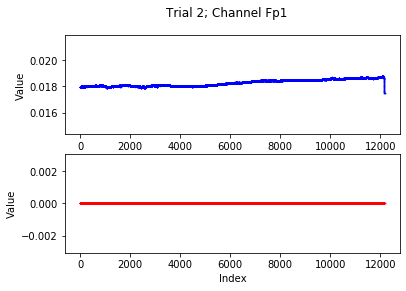

ca [-0.0109906  -0.01099854 -0.0109889  ... -0.01060927 -0.01059089
 -0.01059145]
cd [ 8.1936497e-07 -4.9110025e-07  1.9496781e-08 ... -2.6892789e-07
 -3.4301610e-07  2.3414586e-07]


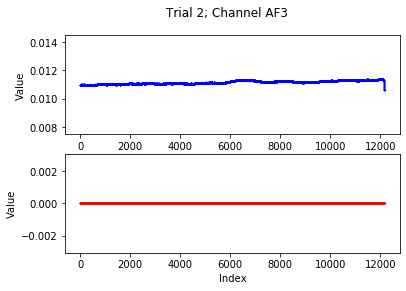

ca [-0.00966164 -0.00966662 -0.00966133 ... -0.00947253 -0.00945427
 -0.00945249]
cd [ 9.4338640e-07 -7.0678072e-07 -3.6230577e-07 ... -1.5431371e-07
  5.2425662e-07  3.8737539e-08]


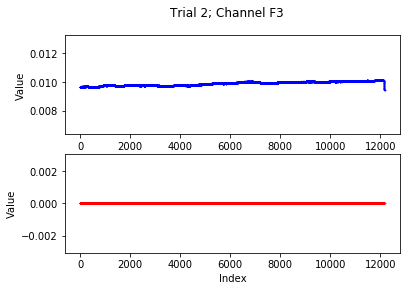

ca [-0.03176513 -0.03177307 -0.03176799 ... -0.03009712 -0.03004169
 -0.03003615]
cd [-1.1619316e-06  1.3794751e-06 -2.8790478e-07 ... -1.0808242e-06
  6.5436109e-07  7.6465454e-08]


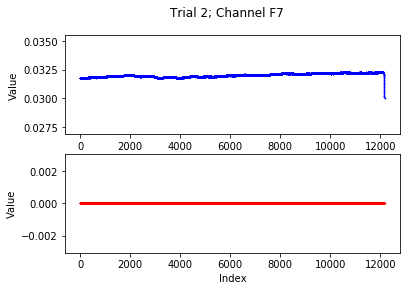

ca [0.01479424 0.0147889  0.01479246 ... 0.01373219 0.01370277 0.01370158]
cd [-9.2451302e-08  2.6666470e-07 -6.7389595e-07 ... -3.9049013e-07
  1.3339034e-07  1.5965331e-07]


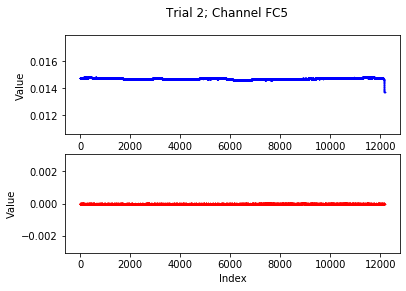

ca [0.00267314 0.00267258 0.00267612 ... 0.00200956 0.00200408 0.00200265]
cd [ 2.8753533e-07  3.9484611e-08 -4.2443037e-07 ... -3.5973196e-07
  2.7242376e-07 -2.8304362e-07]


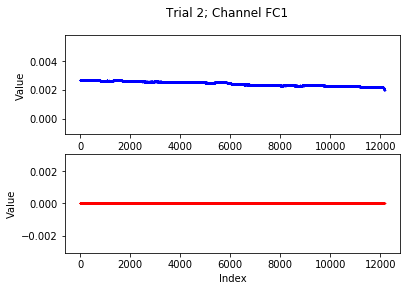

ca [-0.01175003 -0.01175582 -0.01175495 ... -0.01117906 -0.01115881
 -0.01115618]
cd [ 3.7750146e-07 -2.0074444e-07 -2.8135594e-07 ... -4.6630099e-08
  1.3363032e-07  2.9362613e-07]


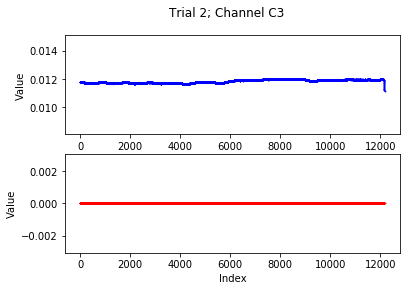

ca [-0.0259213  -0.02592431 -0.02592191 ... -0.02465211 -0.02460496
 -0.02460153]
cd [-2.1613389e-06  1.9715878e-06  1.2435743e-07 ...  6.2007382e-07
 -1.0072874e-06 -1.0342515e-07]


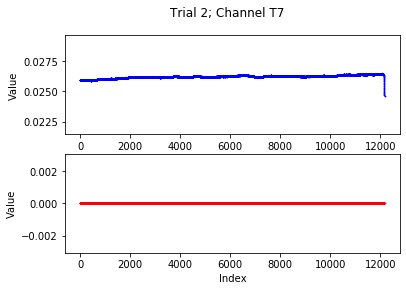

ca [-0.01543082 -0.01543396 -0.01543428 ... -0.01444475 -0.01442045
 -0.01441841]
cd [-3.2444956e-07  5.4031869e-07 -6.5881994e-07 ...  5.0116614e-07
 -5.0881204e-07 -7.0640070e-08]


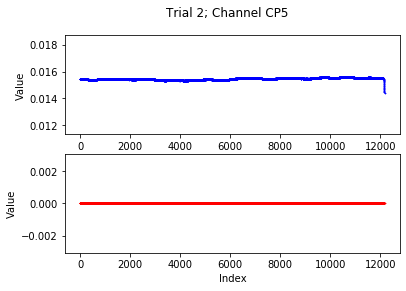

ca [-0.00414476 -0.00414896 -0.00414893 ... -0.00363174 -0.00362602
 -0.00362597]
cd [-7.8081740e-08  3.4361403e-07 -1.4477556e-07 ... -1.3305920e-07
  1.9087140e-07 -4.8758249e-08]


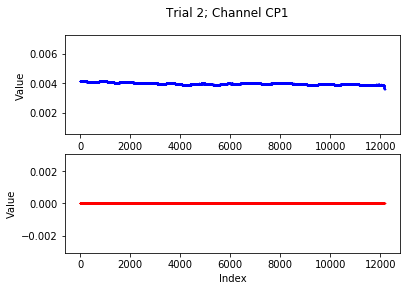

ca [-0.01720263 -0.01720913 -0.0172096  ... -0.01586972 -0.01583742
 -0.01583515]
cd [ 2.5873965e-07  7.0811211e-08 -9.9620223e-08 ... -4.1343912e-07
  7.0665646e-07 -7.7917468e-07]


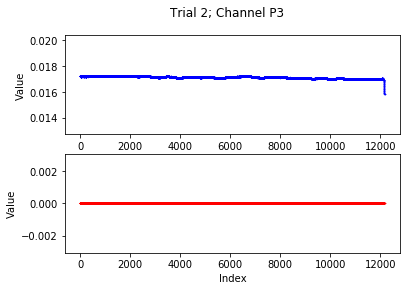

ca [-0.0162949  -0.01630835 -0.0163126  ... -0.01553599 -0.01549837
 -0.01549428]
cd [-1.2204122e-06  1.4740992e-06  2.2648626e-07 ... -1.9035633e-07
  6.4412689e-09  4.0355638e-07]


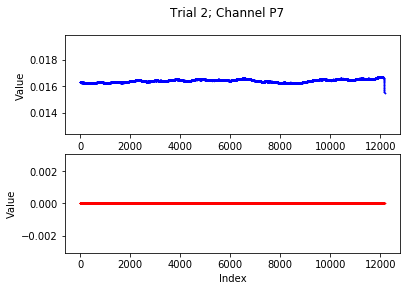

ca [-0.02880872 -0.02882129 -0.02880989 ... -0.02676232 -0.02671306
 -0.02670339]
cd [ 7.6928143e-07  6.0870229e-07 -1.3279627e-06 ...  1.4382676e-06
 -1.2552903e-06  2.0811555e-07]


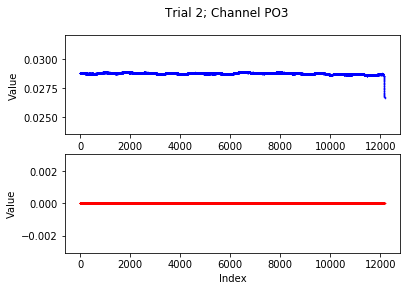

ca [-0.01720691 -0.01720886 -0.01720823 ... -0.01622658 -0.01619758
 -0.01619623]
cd [-5.2326061e-07  1.0477032e-06 -1.2427584e-07 ... -1.8576641e-07
  7.5307156e-07 -2.8140815e-07]


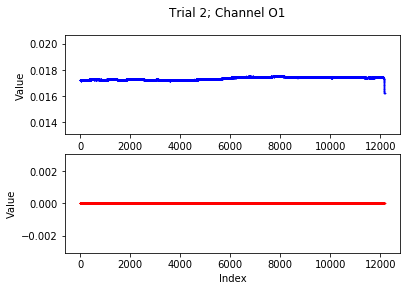

ca [-0.01605744 -0.01606043 -0.01606053 ... -0.01546126 -0.01542562
 -0.01542288]
cd [ 3.2731364e-08  5.9237584e-07  7.1042521e-08 ...  1.1687386e-07
  2.9898894e-07 -1.1675241e-06]


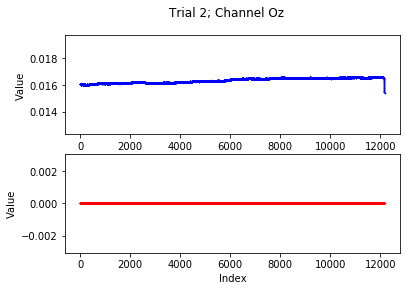

ca [-0.02234662 -0.02235503 -0.02235625 ... -0.02073242 -0.02069276
 -0.02068847]
cd [ 1.1671116e-07  4.1703387e-07 -4.3812463e-08 ...  3.9989368e-07
 -4.7784368e-08  4.4982008e-07]


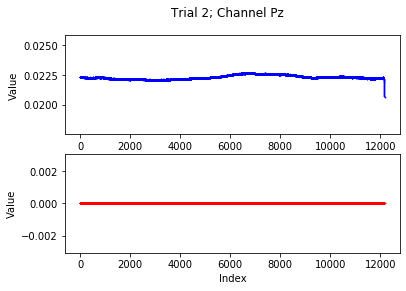

ca [-0.00654042 -0.00655039 -0.00654412 ... -0.0067232  -0.00671799
 -0.00671777]
cd [ 8.8910082e-07 -1.1800717e-07 -1.8122897e-07 ... -1.8230623e-06
  1.1119478e-06 -3.2741022e-07]


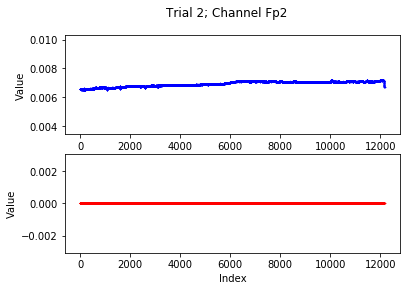

ca [-0.01586558 -0.01586898 -0.01586291 ... -0.0147584  -0.01473082
 -0.01472841]
cd [ 1.2945209e-06 -6.9250854e-07 -5.2146584e-07 ...  1.2898444e-07
 -8.6382965e-07 -1.3167590e-06]


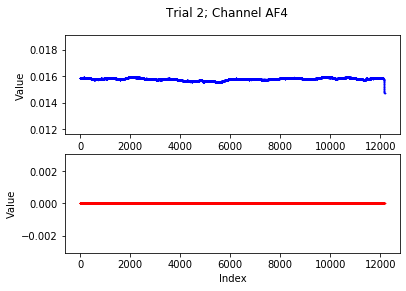

ca [-0.00561053 -0.00561683 -0.00561157 ... -0.00567723 -0.00566614
 -0.00566253]
cd [ 9.7828422e-07 -2.0039599e-07 -3.3642013e-07 ... -3.3673810e-08
 -2.7850831e-07 -2.0671334e-07]


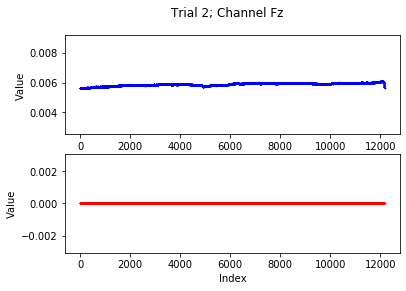

ca [0.00400522 0.00399837 0.00400434 ... 0.00353078 0.00352285 0.00352182]
cd [ 2.3329110e-06 -1.5185091e-06 -4.4451679e-07 ...  7.1676646e-07
 -3.5237221e-07 -6.7991965e-07]


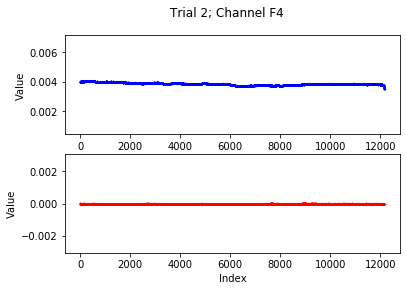

ca [-0.03108964 -0.03110121 -0.03109579 ... -0.02913584 -0.02907314
 -0.02906502]
cd [ 8.5952331e-07 -3.6438189e-07 -4.4436632e-07 ...  8.1197936e-07
 -1.3458259e-06 -2.1364053e-07]


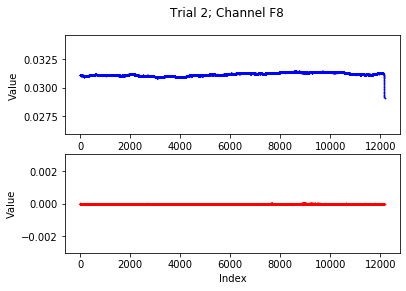

ca [-0.02259833 -0.02260249 -0.02259945 ... -0.02015424 -0.02012113
 -0.02011771]
cd [ 2.1353324e-06 -1.4699538e-06 -6.5141001e-07 ...  1.0774470e-06
  5.6175065e-07 -4.9074617e-07]


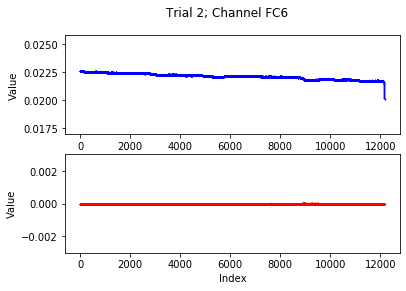

ca [0.01354972 0.0135446  0.01354861 ... 0.01249981 0.01247628 0.012475  ]
cd [ 1.14034094e-06 -5.65052005e-07 -5.67289362e-07 ...  1.17513636e-07
 -8.22852940e-07  1.70210058e-06]


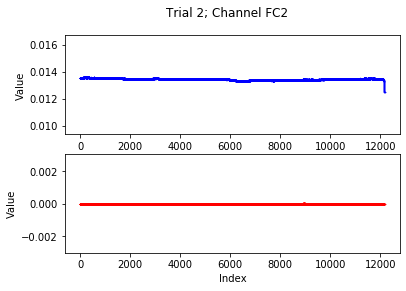

ca [0.00441906 0.0044145  0.00441839 ... 0.00452246 0.00451686 0.00451664]
cd [ 4.3889983e-07  6.7707816e-08 -1.3734804e-07 ...  4.3428093e-07
 -7.0502375e-07  7.6067306e-07]


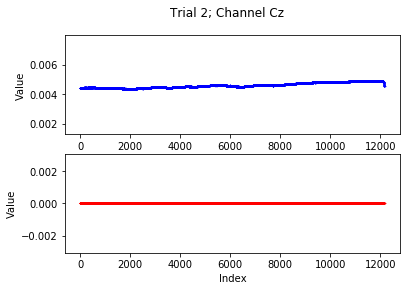

ca [-0.01555039 -0.01555378 -0.01554905 ... -0.01436596 -0.01433409
 -0.01433062]
cd [ 4.8026425e-07  1.1069758e-08 -4.8749882e-07 ...  1.2241874e-07
  5.6039966e-08 -4.7467461e-07]


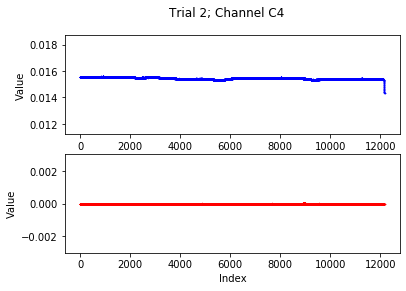

ca [-0.02394035 -0.02394633 -0.0239365  ... -0.0225467  -0.02250683
 -0.02250174]
cd [-3.2241323e-07  4.9168472e-07  4.4027462e-07 ...  3.7773697e-07
  7.4445410e-07 -9.1554676e-07]


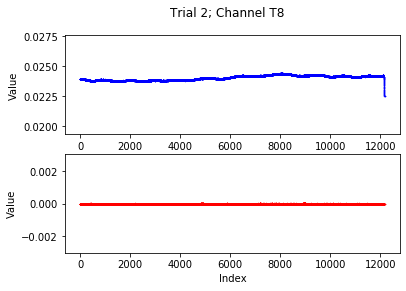

ca [-0.01448418 -0.01449112 -0.01448403 ... -0.0132923  -0.01326295
 -0.01325816]
cd [ 4.2345363e-07  9.1199979e-08 -7.9720337e-08 ...  8.1602741e-07
 -9.7144289e-07  1.8302460e-07]


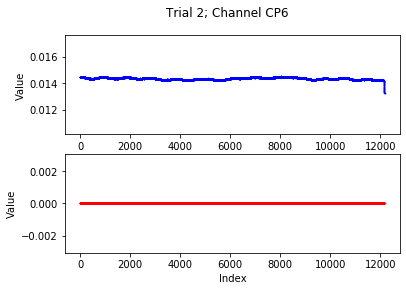

ca [-0.00946372 -0.00947062 -0.00946563 ... -0.00845693 -0.00844017
 -0.00843893]
cd [ 8.13641748e-07 -2.91785085e-07  5.62549474e-09 ... -8.08126799e-07
  9.70675202e-08  1.04172805e-07]


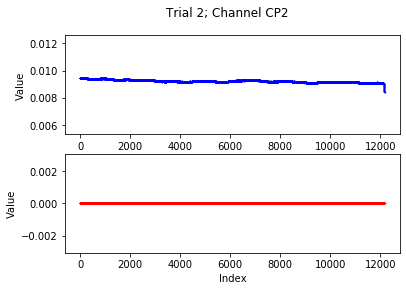

ca [-0.01369062 -0.01369683 -0.01369145 ... -0.01300332 -0.01297407
 -0.01297144]
cd [ 3.0289209e-07  2.5692722e-07 -5.7331954e-07 ... -7.2588620e-09
 -7.6493802e-07  8.0908831e-07]


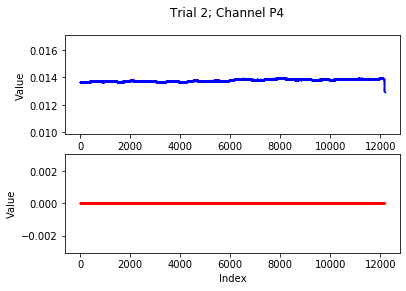

ca [-0.02071704 -0.02072149 -0.02071504 ... -0.0197314  -0.01969452
 -0.01969076]
cd [-2.2500014e-07  6.4424250e-07 -3.4254697e-09 ... -1.0746970e-06
  8.5445720e-07 -1.9606341e-06]


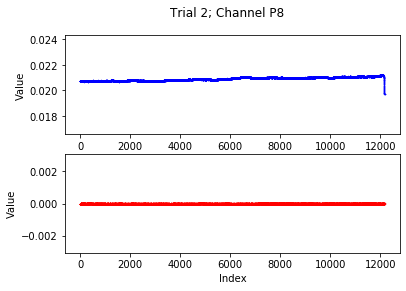

ca [-0.00677192 -0.0067769  -0.00677191 ... -0.00685767 -0.0068448
 -0.00684396]
cd [ 5.54452185e-07  1.18818249e-07 -1.12613165e-07 ...  1.49706909e-06
 -1.92694802e-06  1.25362885e-06]


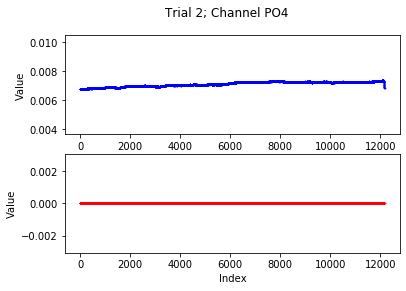

ca [-0.01791194 -0.01791799 -0.01791202 ... -0.01693572 -0.01689926
 -0.01689736]
cd [ 1.4486373e-07  5.7918442e-07 -3.0850731e-07 ... -2.3004988e-07
 -1.8107178e-07 -4.8050390e-07]


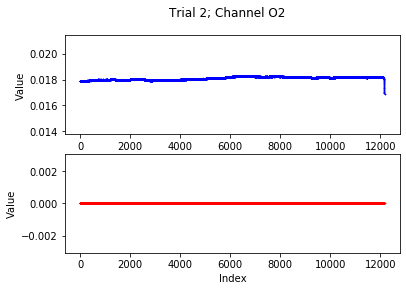

ca [-0.01880098 -0.01880572 -0.01880202 ... -0.01880878 -0.01881447
 -0.01881541]
cd [-2.2115631e-07  4.1333311e-07 -2.7835898e-07 ...  9.3708229e-07
 -5.4879615e-07 -4.5260606e-07]


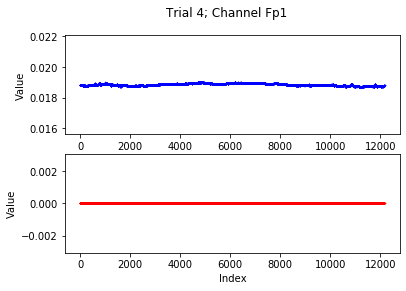

ca [-0.01135605 -0.01136119 -0.01135501 ... -0.01136894 -0.01136644
 -0.0113662 ]
cd [ 8.1845208e-08  1.6915482e-07 -1.6745983e-07 ...  5.8554883e-07
 -2.4687381e-07 -3.7658282e-08]


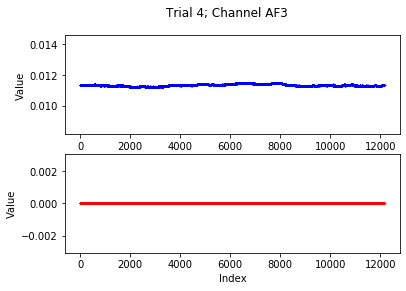

ca [-0.01004999 -0.01005354 -0.01004881 ... -0.0100194  -0.0100219
 -0.01002163]
cd [ 4.2802799e-07 -1.4282396e-07 -2.7783685e-07 ...  6.3062964e-07
 -7.0230129e-07  2.8785593e-07]


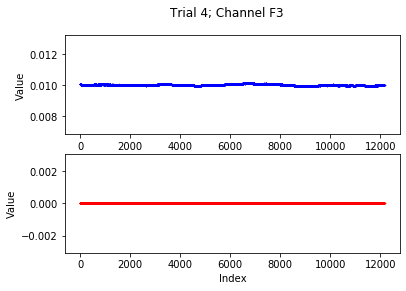

ca [-0.03233406 -0.03234001 -0.03232495 ... -0.03202823 -0.03202019
 -0.03201756]
cd [ 1.0793781e-07  4.9450421e-07 -4.8566073e-07 ...  8.9412754e-07
 -3.6843076e-07 -6.9717584e-07]


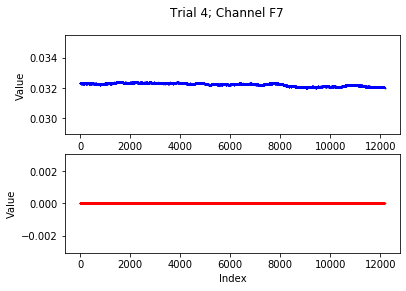

ca [0.0147914  0.01479045 0.01479836 ... 0.01524206 0.0152462  0.0152463 ]
cd [ 9.5337811e-08  2.4412680e-07 -6.2087571e-07 ...  5.9303312e-07
 -1.5278906e-07 -5.1608396e-08]


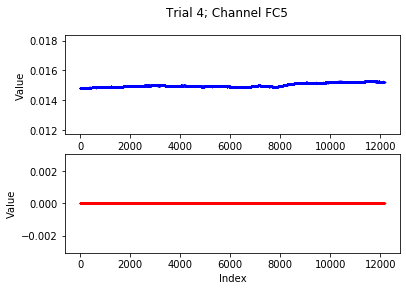

ca [0.00220087 0.0021964  0.00220021 ... 0.00219863 0.00219549 0.00219551]
cd [ 2.19179146e-08  2.70092126e-08 -1.13845971e-07 ... -4.33111268e-07
  8.76199557e-09 -1.14255656e-07]


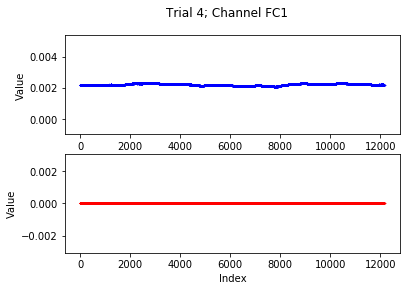

ca [-0.01205365 -0.0120564  -0.01205145 ... -0.01182425 -0.0118282
 -0.01182745]
cd [ 4.2082220e-07 -1.8295395e-07 -3.7261464e-07 ...  6.7562866e-08
  6.8420484e-08 -1.3111890e-07]


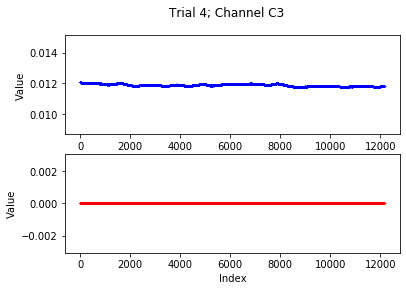

ca [-0.02654044 -0.02654365 -0.02653752 ... -0.02649395 -0.02650159
 -0.02650137]
cd [ 1.4480020e-06 -7.8571009e-07 -2.7288559e-07 ...  1.4997681e-06
 -1.7226945e-06  1.2210753e-06]


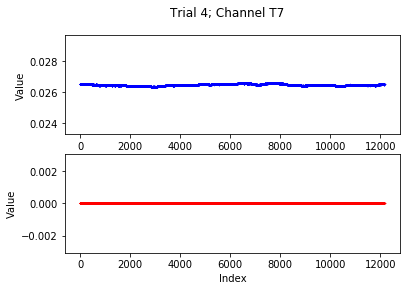

ca [-0.01547919 -0.01547758 -0.01547413 ... -0.0153354  -0.01533435
 -0.01533465]
cd [ 3.7852197e-07 -3.3237529e-07 -7.4757662e-07 ... -9.8391851e-08
  1.6008448e-07  3.5876940e-07]


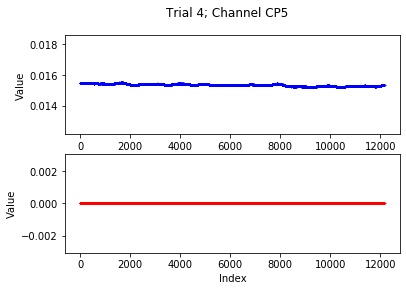

ca [-0.00382172 -0.00382477 -0.00382124 ... -0.00326888 -0.00326945
 -0.00326989]
cd [-3.4899256e-07  3.0639706e-07 -5.8834337e-07 ...  4.3187320e-08
  2.8377167e-07 -2.3304239e-07]


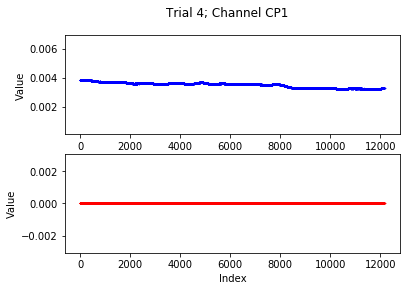

ca [-0.01696826 -0.01697026 -0.01696671 ... -0.01635955 -0.01636121
 -0.01636085]
cd [ 1.8535798e-07 -2.7260108e-07 -9.3910529e-07 ...  1.9137165e-07
  5.0177732e-07 -1.0493878e-06]


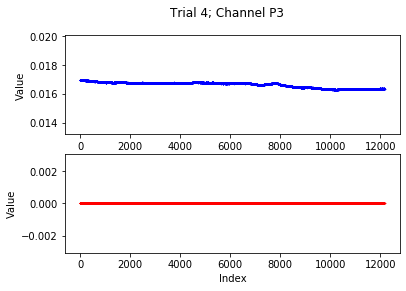

ca [-0.01672454 -0.01672492 -0.01672387 ... -0.01632966 -0.01632722
 -0.01632875]
cd [ 1.6088991e-07 -3.6202408e-07 -1.4900504e-06 ...  7.4043373e-07
 -6.2649423e-07 -2.5804766e-08]


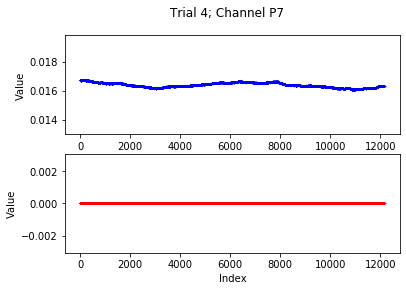

ca [-0.02873592 -0.02874989 -0.02873255 ... -0.02838588 -0.02838878
 -0.02838799]
cd [ 1.5330786e-06 -9.0456683e-07 -1.0175179e-06 ... -8.5591637e-07
  1.5258278e-06 -9.8075498e-07]


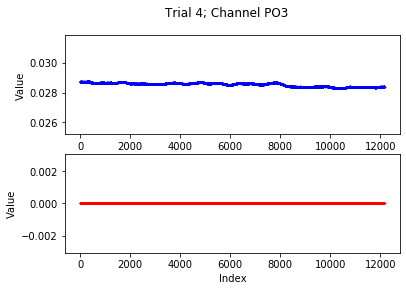

ca [-0.01744657 -0.01744849 -0.01744458 ... -0.01737232 -0.01737113
 -0.01736851]
cd [-2.2418321e-06  1.8611336e-06 -1.5556336e-06 ... -6.4811798e-07
  1.8969075e-06 -1.2907967e-06]


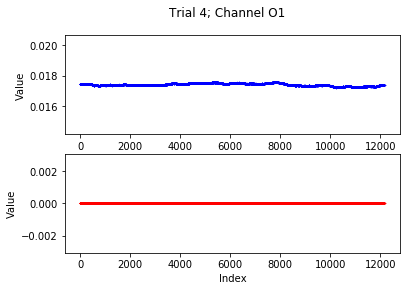

ca [-0.01663378 -0.01663563 -0.01663338 ... -0.01640828 -0.01640662
 -0.01640582]
cd [-1.5198810e-06  1.0366372e-06 -1.4499291e-06 ... -4.9419378e-07
  5.1925679e-07 -4.7391740e-07]


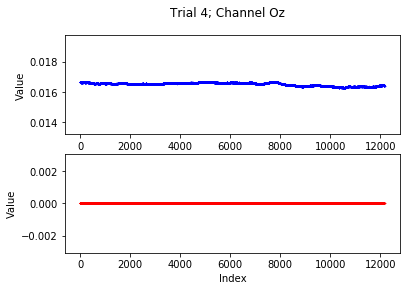

ca [-0.02249762 -0.02250209 -0.02250441 ... -0.02230058 -0.02230181
 -0.02230188]
cd [-1.3225238e-06  1.1034534e-06 -4.9175895e-07 ...  7.9918877e-08
 -8.2170573e-09  5.1717348e-07]


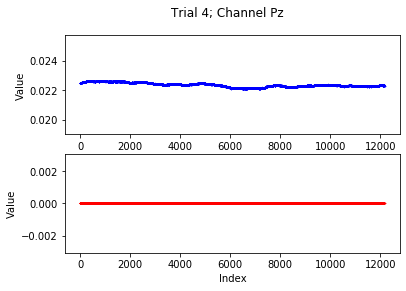

ca [-0.00722953 -0.00723364 -0.00722073 ... -0.00714422 -0.00714974
 -0.00715121]
cd [-1.0175842e-07  4.2625047e-07  4.3390168e-07 ... -5.1855903e-07
  4.2307266e-07 -7.7705778e-07]


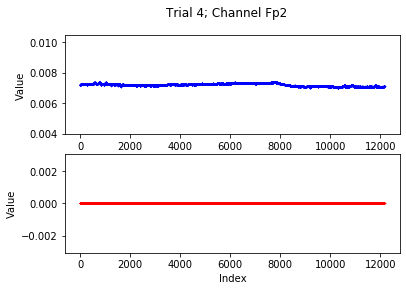

ca [-0.01572852 -0.01572914 -0.01571762 ... -0.01542659 -0.01543584
 -0.0154363 ]
cd [ 4.8078391e-07  1.4069731e-07  6.7125444e-07 ... -2.6376063e-07
  4.1676751e-07  2.5792457e-07]


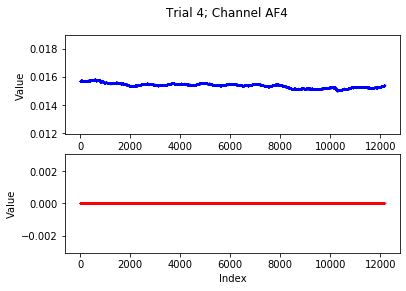

ca [-0.00603897 -0.00604259 -0.00603424 ... -0.00592256 -0.00592928
 -0.00592906]
cd [ 8.7835211e-08  2.6827649e-07  3.3068443e-07 ...  7.2124777e-07
  8.1130025e-08 -7.9422540e-07]


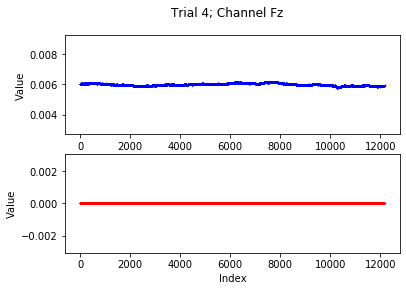

ca [0.00382244 0.00381908 0.00382917 ... 0.00418708 0.00418715 0.00418706]
cd [ 5.9268302e-07 -1.5906927e-07  7.9857938e-07 ... -8.2574263e-07
  7.1280931e-07  2.5572373e-07]


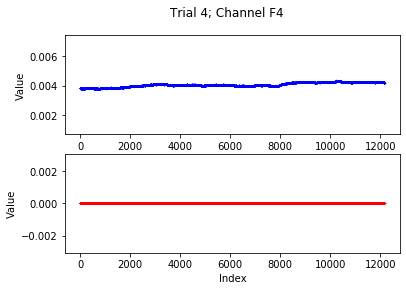

ca [-0.03147237 -0.03147145 -0.0314604  ... -0.03135456 -0.03136581
 -0.03136773]
cd [ 1.2261513e-06 -1.0722172e-06  1.0745717e-06 ... -5.3575684e-07
 -5.2489099e-07 -2.3530737e-07]


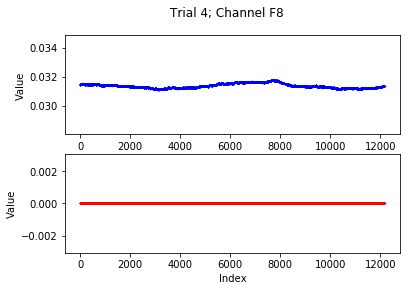

ca [-0.02151797 -0.02151777 -0.02150729 ... -0.02051305 -0.02051052
 -0.02050816]
cd [ 5.9189972e-07 -2.4589588e-07  2.5010792e-07 ...  5.2774681e-07
 -1.4734306e-06  1.6517547e-06]


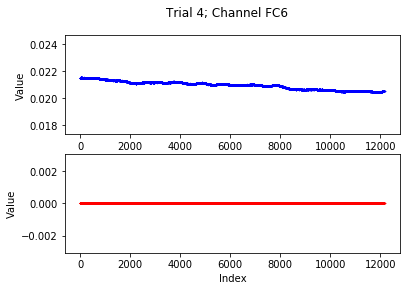

ca [0.01347688 0.01347382 0.01348245 ... 0.01391496 0.01391601 0.01391702]
cd [ 9.0449186e-07 -6.4625698e-07  4.8918264e-07 ... -1.6753461e-08
  4.8696552e-07 -3.4190879e-07]


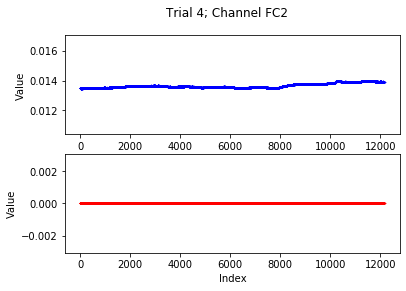

ca [0.00492612 0.00492047 0.00492636 ... 0.00572444 0.0057162  0.00571445]
cd [ 5.3344593e-07 -3.4403035e-07  3.3351262e-07 ... -4.5908740e-07
  9.7932923e-07 -2.2843977e-07]


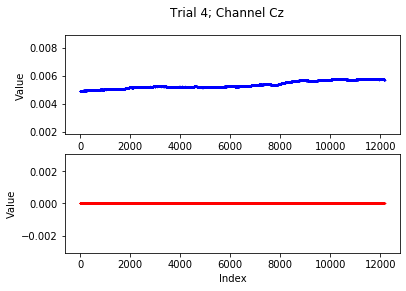

ca [-0.01529584 -0.01529757 -0.01528869 ... -0.01465435 -0.01465698
 -0.01465646]
cd [ 2.7185902e-07 -2.7922465e-07  2.0263948e-07 ... -6.4526023e-07
  6.6968255e-07 -2.1241749e-07]


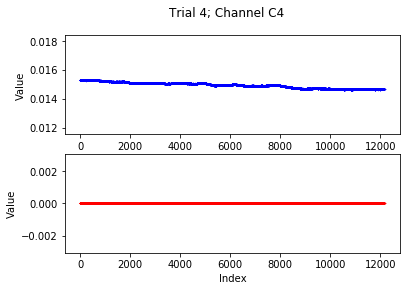

ca [-0.02422075 -0.02422487 -0.0242189  ... -0.02390931 -0.02390172
 -0.02390416]
cd [ 6.6400582e-07 -8.3411521e-07  2.2151593e-07 ... -9.2142869e-07
 -8.6505702e-07  4.4648786e-07]


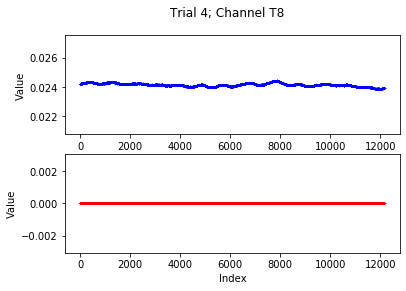

ca [-0.01419797 -0.01420031 -0.01419051 ... -0.01377417 -0.013774
 -0.01377625]
cd [ 1.2409610e-07 -2.2870051e-07 -4.9446101e-08 ... -1.1092573e-06
  1.5743352e-06 -4.2550639e-07]


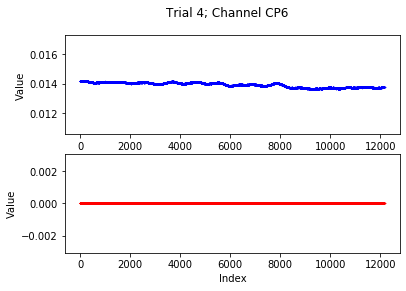

ca [-0.00894144 -0.00894683 -0.00894    ... -0.00827076 -0.00827273
 -0.00827285]
cd [ 3.79387444e-07 -3.11655810e-07 -1.38461544e-08 ...  3.25057414e-07
  6.71195380e-07 -3.60266085e-07]


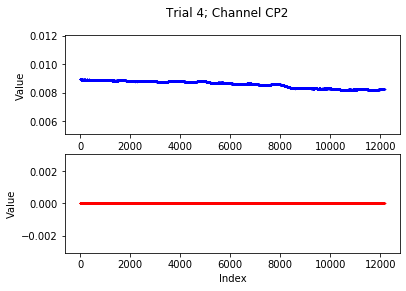

ca [-0.01402333 -0.01402877 -0.01401997 ... -0.01396215 -0.01396297
 -0.0139638 ]
cd [-2.0224766e-07 -4.4214289e-08 -3.0983782e-07 ... -3.3163900e-07
  6.0394115e-07 -5.1245269e-07]


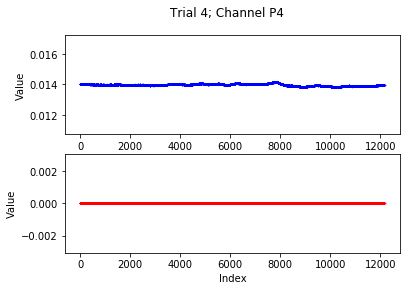

ca [-0.0212716  -0.02127835 -0.0212674  ... -0.02132543 -0.02132813
 -0.02132825]
cd [-9.9822637e-07  4.4711058e-07  2.9879672e-08 ...  1.0590779e-06
 -3.7766210e-07  6.7750841e-07]


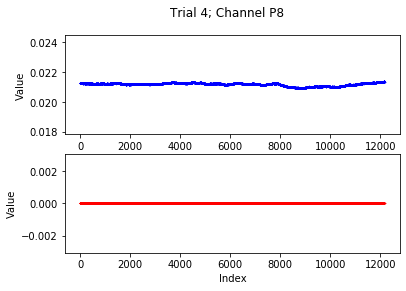

ca [-0.00740092 -0.00741051 -0.00740433 ... -0.00741148 -0.00741537
 -0.00741503]
cd [-2.0913662e-07 -2.3083061e-08 -3.5966858e-07 ... -2.9369536e-07
  4.4633668e-07 -5.9662312e-07]


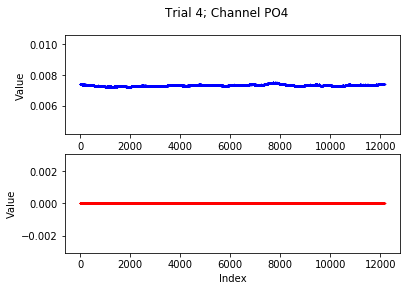

ca [-0.01823726 -0.01824526 -0.01823844 ... -0.01805688 -0.01805751
 -0.01805607]
cd [ 1.1852548e-07 -3.0910297e-07 -7.3991657e-08 ... -1.1118639e-06
  4.4879022e-07 -1.1105510e-07]


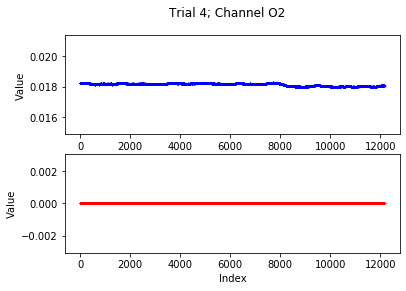

ca [-0.01870835 -0.01871041 -0.01871699 ... -0.01815006 -0.01813482
 -0.01813264]
cd [-7.8492133e-07  2.3786649e-07 -6.6169315e-07 ... -1.6464298e-08
  4.8135087e-07 -2.8689615e-07]


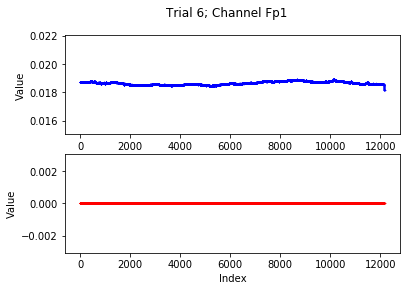

ca [-0.01131945 -0.01132045 -0.01132615 ... -0.01102913 -0.01101962
 -0.01101784]
cd [-9.0934668e-07  6.6171987e-07  1.4821964e-08 ...  1.7714571e-07
 -4.9693604e-08  3.5752592e-07]


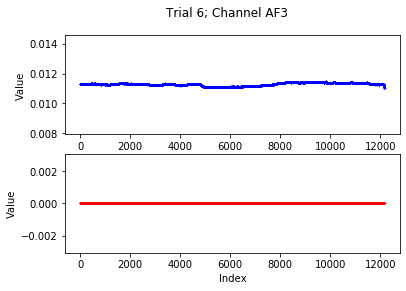

ca [-0.00997545 -0.00998059 -0.00998646 ... -0.00966961 -0.00966345
 -0.00966204]
cd [-7.3184344e-07  4.3438217e-07 -5.7004343e-08 ... -4.4672805e-07
  2.7304765e-08 -1.4369022e-07]


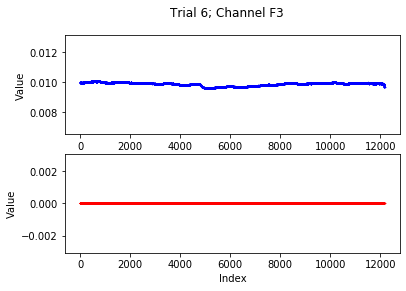

ca [-0.03186617 -0.03186401 -0.03186399 ... -0.03088622 -0.03086262
 -0.03086132]
cd [-1.8590181e-06  1.4481088e-06 -2.5665130e-07 ... -4.6548615e-07
  2.5099169e-07  3.5975015e-07]


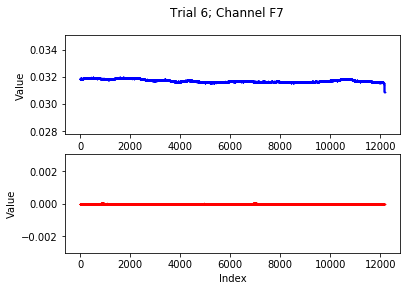

ca [0.01528513 0.01528036 0.01528039 ... 0.01513839 0.01513292 0.01513249]
cd [-1.4938892e-06  1.1913869e-06 -1.1840709e-07 ... -5.9865425e-07
 -4.0161865e-08  3.9365460e-08]


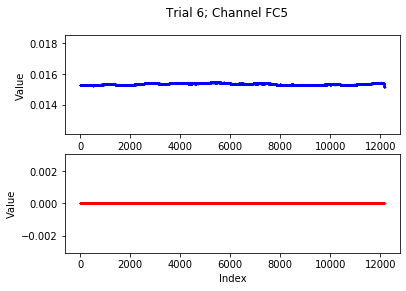

ca [0.00219932 0.00219651 0.00219369 ... 0.00199579 0.00199439 0.00199412]
cd [-1.1175771e-06  9.1364501e-07 -1.3348431e-07 ... -2.3902862e-07
  4.3765169e-10  1.5181978e-08]


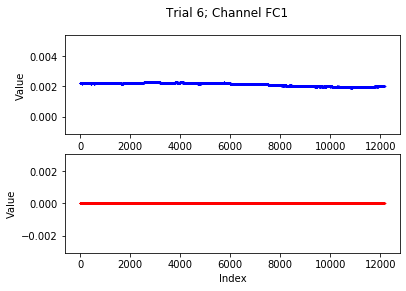

ca [-0.01178967 -0.01179075 -0.01179299 ... -0.01112131 -0.01111469
 -0.01111442]
cd [-8.7598596e-07  6.3208626e-07  1.5854445e-07 ...  2.6922902e-07
 -2.9307105e-07 -1.4440914e-08]


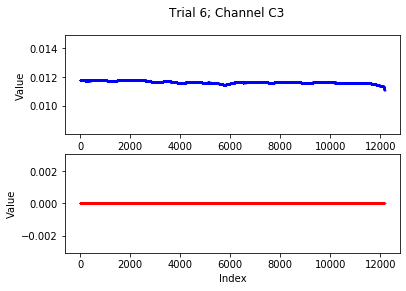

ca [-0.02650126 -0.02650304 -0.0264961  ... -0.02604656 -0.02602612
 -0.02602658]
cd [-7.3387201e-07  2.4281476e-07  4.9389251e-07 ... -3.0390331e-06
  3.0434226e-06 -4.8123701e-07]


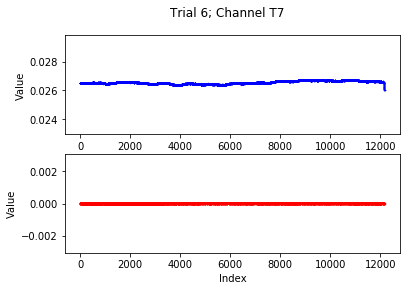

ca [-0.01525407 -0.01525514 -0.01525382 ... -0.01487089 -0.01486388
 -0.01486325]
cd [-1.1397254e-06  1.0256546e-06  2.1798380e-07 ... -6.7466561e-07
  7.0999852e-07 -6.0122488e-07]


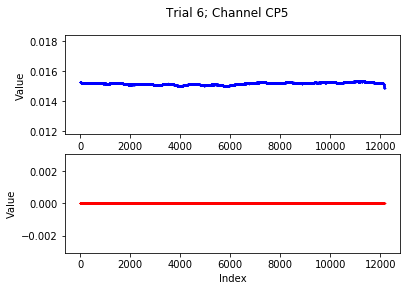

ca [-0.00320746 -0.0032075  -0.00320796 ... -0.0027929  -0.0027909
 -0.00279137]
cd [-5.9496381e-07  4.1427882e-07  2.5064477e-07 ... -3.4473015e-08
  4.2158494e-08  1.2522219e-07]


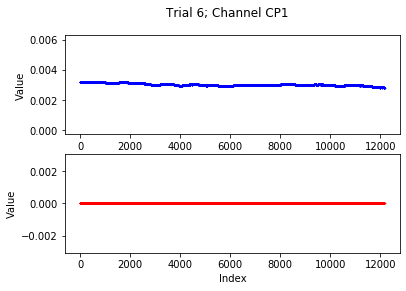

ca [-0.01631248 -0.01630881 -0.01630572 ... -0.01561829 -0.0156121
 -0.01561062]
cd [-1.86657530e-06  1.73603155e-06 -1.31739498e-07 ...  3.44565933e-07
 -1.30192390e-07 -1.05135896e-07]


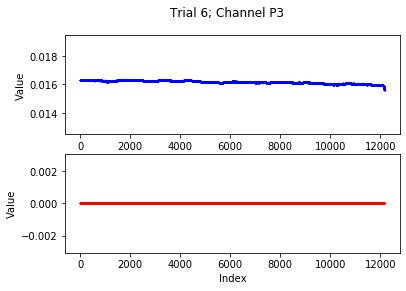

ca [-0.01617487 -0.01617622 -0.01617587 ... -0.01624832 -0.01623852
 -0.016237  ]
cd [-1.4689583e-06  1.1903662e-06  9.8522696e-07 ...  3.0247875e-07
 -1.9138866e-07 -2.3995787e-07]


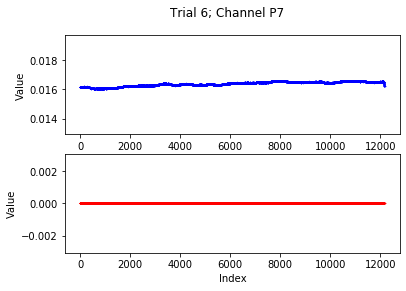

ca [-0.0283139  -0.02829875 -0.02830199 ... -0.02771796 -0.02771462
 -0.02771336]
cd [-3.1846769e-06  1.8004025e-06  1.4889229e-06 ...  8.0152660e-07
  7.8340264e-07 -1.9499259e-07]


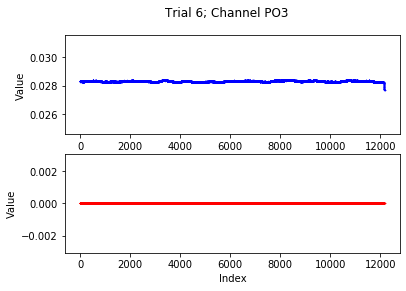

ca [-0.01736714 -0.01736555 -0.01735828 ... -0.01701219 -0.01700888
 -0.01700838]
cd [-3.3960603e-06  3.0075371e-06 -6.5187623e-07 ...  1.5275810e-07
 -8.6584237e-08  3.6564688e-07]


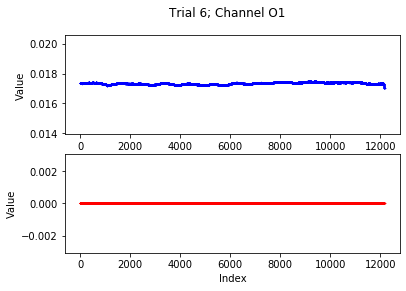

ca [-0.01639889 -0.01639472 -0.01638834 ... -0.01611608 -0.01610944
 -0.01611108]
cd [-2.2168126e-06  1.8978512e-06 -5.6595411e-08 ...  9.7960509e-08
 -2.2103686e-07 -6.7515799e-08]


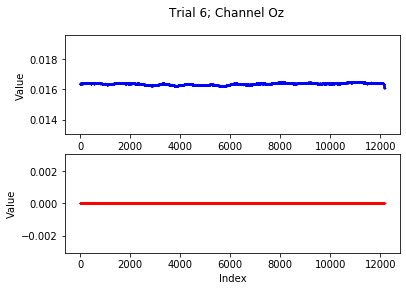

ca [-0.02222048 -0.02221939 -0.0222327  ... -0.02129991 -0.02129326
 -0.02129305]
cd [-4.3377761e-07  3.2952761e-07  6.7114615e-07 ...  2.8580860e-07
 -3.4437903e-07  2.8217471e-07]


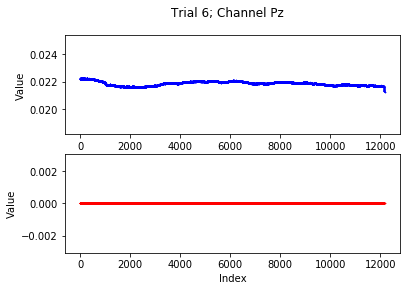

ca [-0.00709497 -0.00709044 -0.00709722 ... -0.00693694 -0.00692633
 -0.00692577]
cd [-1.8018814e-06  8.3477033e-07 -6.9304076e-07 ... -1.0724240e-06
  9.7789803e-07 -9.1167624e-07]


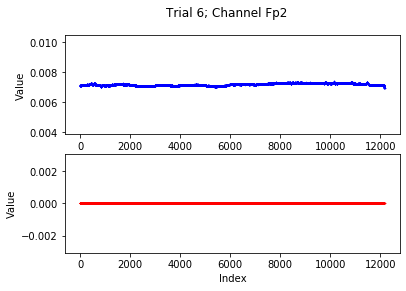

ca [-0.01521684 -0.01521624 -0.01522708 ... -0.01452472 -0.01450954
 -0.01451025]
cd [-1.6607141e-06  6.5779307e-07  7.8187838e-08 ... -1.9571560e-07
 -2.0879780e-07  2.0321306e-07]


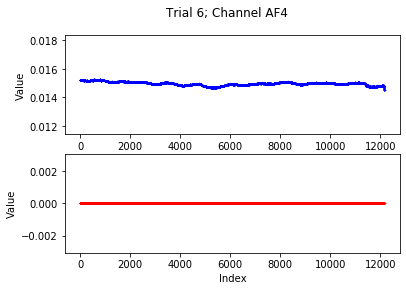

ca [-0.00595174 -0.00594854 -0.00595701 ... -0.00570666 -0.00570197
 -0.00570149]
cd [-9.3205972e-07  1.6010543e-07 -3.6589718e-09 ... -6.3283392e-07
  2.4849527e-07 -5.5656199e-07]


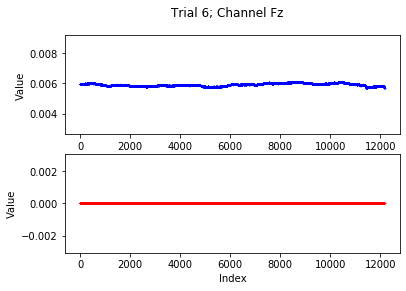

ca [0.00426001 0.00426246 0.00425114 ... 0.0044357  0.00443363 0.00443471]
cd [-1.6926700e-06  6.7560063e-07 -3.2849030e-07 ...  1.4188609e-07
 -2.9582912e-07  7.5654964e-07]


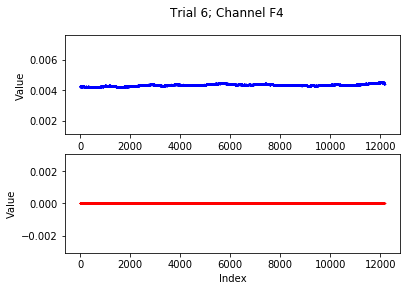

ca [-0.0314283  -0.03142029 -0.03143399 ... -0.03042277 -0.03040614
 -0.03040336]
cd [-3.2943055e-06  1.6777478e-06 -1.5348795e-07 ...  9.3248849e-07
 -1.8827690e-06  1.7062273e-06]


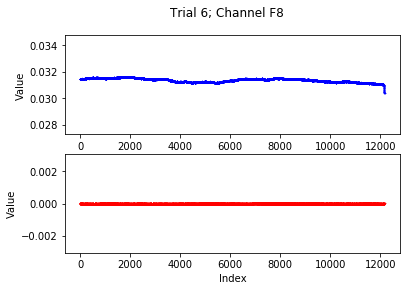

ca [-0.02041975 -0.02041844 -0.02042642 ... -0.01951614 -0.01950087
 -0.01950093]
cd [-2.0801961e-06  1.1291245e-06 -3.0695782e-07 ...  1.1488404e-06
 -5.8048965e-07  2.4703431e-06]


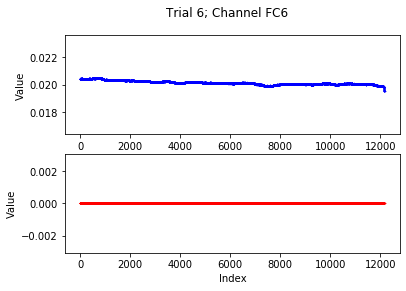

ca [0.01397306 0.01397662 0.0139677  ... 0.01382403 0.01381518 0.01381439]
cd [-1.3653651e-06  7.8068774e-07 -1.4155250e-07 ...  2.5794810e-07
  4.1998391e-08  4.8809864e-07]


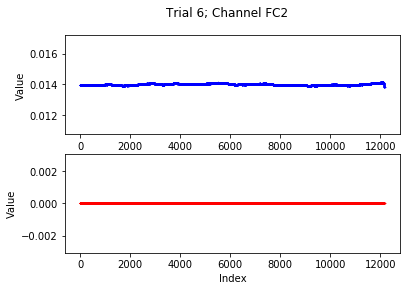

ca [0.00576231 0.00576568 0.00575866 ... 0.00603015 0.00602491 0.00602429]
cd [-8.5793857e-07  4.0313327e-07 -7.9185753e-08 ...  1.1871293e-07
  3.5142654e-07  4.0898664e-07]


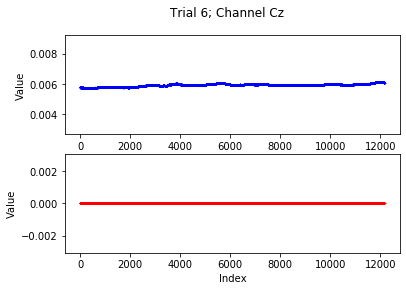

ca [-0.01457992 -0.0145771  -0.01458474 ... -0.01388565 -0.0138804
 -0.01387886]
cd [-1.5697270e-06  9.2418458e-07 -1.8360774e-07 ... -8.4382600e-07
 -1.8799976e-07 -1.2861595e-07]


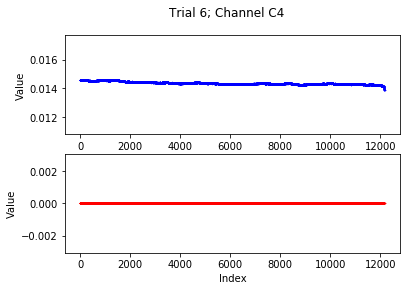

ca [-0.02392307 -0.02392053 -0.02393144 ... -0.02343499 -0.02342539
 -0.02342525]
cd [-4.9305786e-06  4.0026384e-06 -1.9199686e-06 ...  3.4127245e-06
 -1.8086380e-06  3.3259070e-08]


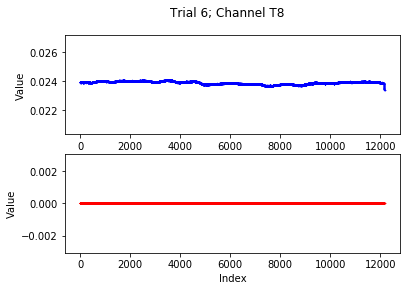

ca [-0.01361105 -0.01360666 -0.01361092 ... -0.01313358 -0.01313182
 -0.01313191]
cd [-1.6083821e-06  8.1676222e-07  8.0832976e-08 ... -3.6368442e-07
  1.0963224e-06  5.8471215e-07]


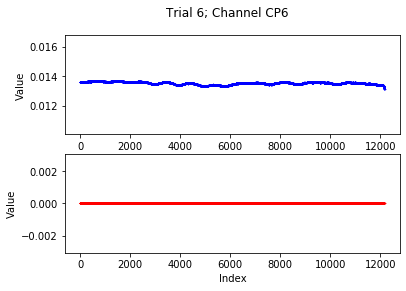

ca [-0.00824561 -0.00824069 -0.00824671 ... -0.00773308 -0.00773117
 -0.00773134]
cd [-6.6165069e-07  2.9283368e-07  1.8192247e-07 ... -5.8137454e-07
  7.6559235e-07 -5.1625682e-07]


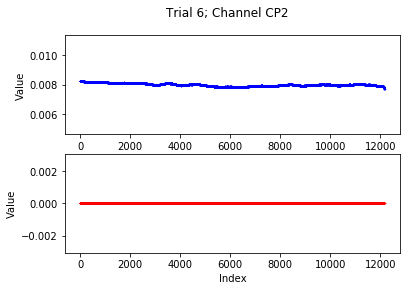

ca [-0.01394    -0.01393454 -0.01393892 ... -0.01382575 -0.01382066
 -0.01382027]
cd [-1.5344408e-06  9.9651720e-07  4.2226097e-07 ... -2.5374945e-07
  4.5486840e-07 -3.8504359e-07]


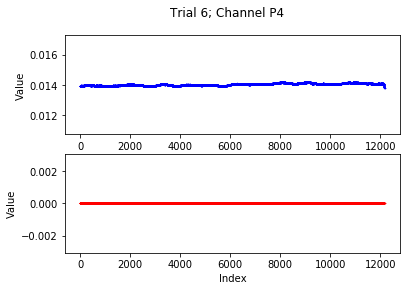

ca [-0.02137143 -0.02136543 -0.02137303 ... -0.02129041 -0.02128432
 -0.02128351]
cd [-1.8785564e-06  9.5061534e-07  1.8026172e-07 ...  7.9797326e-07
  1.1220910e-06 -9.5283929e-07]


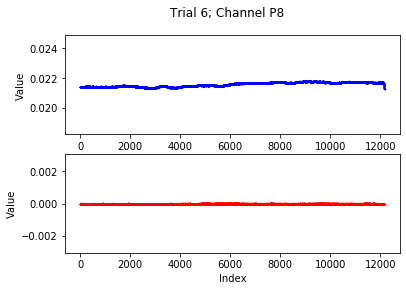

ca [-0.00749472 -0.00748734 -0.00748881 ... -0.00756548 -0.00756361
 -0.00756173]
cd [-2.1322810e-06  1.4551897e-06 -2.9862349e-07 ...  2.3151193e-07
  1.6798104e-08  1.6835736e-07]


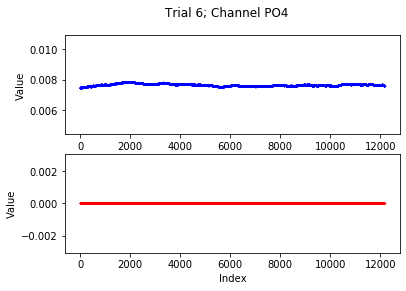

ca [-0.0180179  -0.01801023 -0.01801318 ... -0.01763093 -0.01763456
 -0.01763054]
cd [-2.7670860e-06  2.0810808e-06 -1.8087292e-08 ...  1.6239252e-07
  2.9991372e-07 -9.4614239e-07]


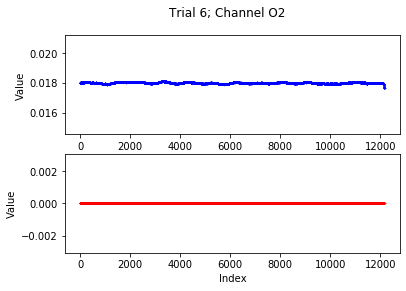

ca [-0.01861485 -0.01861664 -0.01860293 ... -0.01890416 -0.01891101
 -0.01890946]
cd [ 1.5397688e-06 -6.9384203e-07 -3.2977127e-08 ... -1.0852024e-07
  6.6979266e-07  3.0858234e-07]


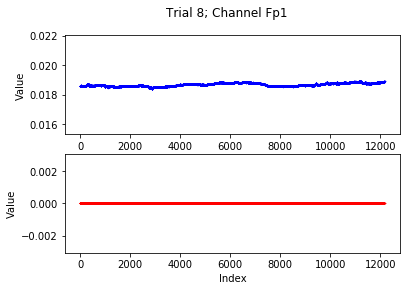

ca [-0.01127308 -0.01127044 -0.01125993 ... -0.0112331  -0.0112342
 -0.01123516]
cd [ 1.1870085e-06 -5.8325531e-07  3.2541428e-07 ... -1.1881372e-07
  6.5076824e-07 -8.6436518e-07]


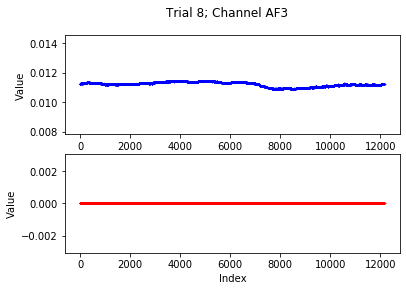

ca [-0.00992125 -0.00992064 -0.00991223 ... -0.00981737 -0.00981892
 -0.00982019]
cd [ 8.7476604e-07 -5.0021447e-07 -2.7683504e-07 ... -8.5363702e-08
  8.4458911e-08  1.0651594e-07]


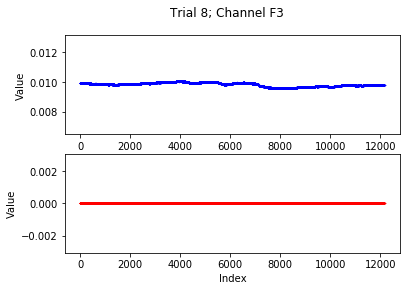

ca [-0.03158467 -0.03158372 -0.03156928 ... -0.03047319 -0.0304767
 -0.0304793 ]
cd [ 1.2375276e-06 -8.1583715e-07 -8.5530758e-07 ...  4.4912863e-07
 -8.0428561e-07  8.3125082e-07]


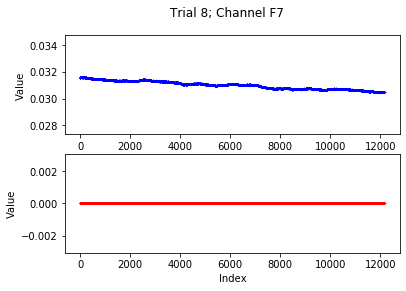

ca [0.01543203 0.01543204 0.01543975 ... 0.015639   0.01563527 0.01563554]
cd [ 1.0632023e-06 -8.9582483e-07 -1.8136780e-07 ... -4.8048167e-07
  7.3421347e-07 -1.0156492e-06]


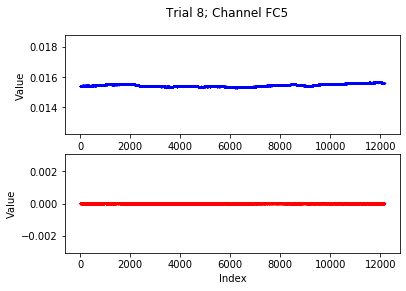

ca [0.00201038 0.0020092  0.00201306 ... 0.00180612 0.00180621 0.00180459]
cd [ 7.5086564e-07 -4.2474869e-07  7.7243712e-08 ... -4.8394111e-07
  4.4696617e-07 -1.3296196e-07]


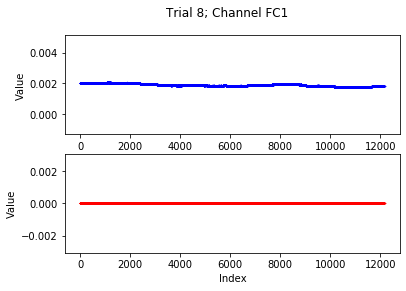

ca [-0.01140976 -0.01140888 -0.01140526 ... -0.01115747 -0.01115707
 -0.0111572 ]
cd [ 6.65434470e-07 -4.32442221e-07  4.19982769e-08 ... -3.02530793e-07
  3.97683436e-07 -1.02773484e-07]


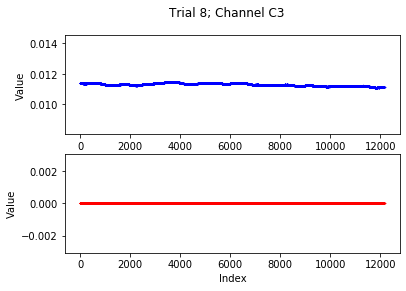

ca [-0.02660982 -0.02661937 -0.02662022 ... -0.02640918 -0.02640157
 -0.02639834]
cd [ 3.7529130e-06 -3.3151257e-06  1.3956014e-06 ... -5.0857398e-07
  2.0661391e-06 -1.8950474e-06]


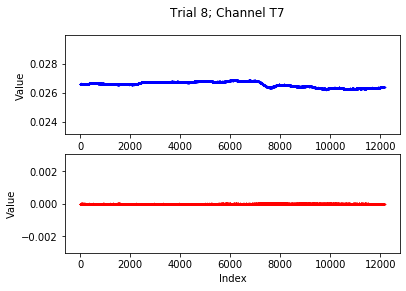

ca [-0.0152097  -0.01521205 -0.01521212 ... -0.01509734 -0.01509732
 -0.01509814]
cd [ 3.4148536e-07 -5.8408074e-07 -5.5842406e-07 ...  2.9730842e-07
  2.3266394e-07 -4.1131568e-07]


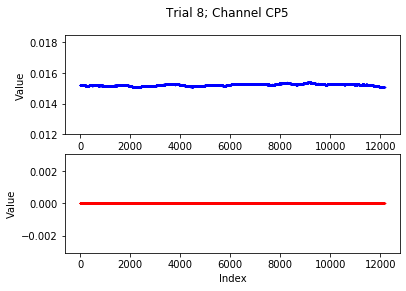

ca [-0.00282757 -0.00282895 -0.0028294  ... -0.00242848 -0.00242873
 -0.00242906]
cd [-1.2130205e-07  1.5886685e-07 -5.2446813e-07 ... -1.7665627e-07
  1.1329370e-07  2.2111924e-07]


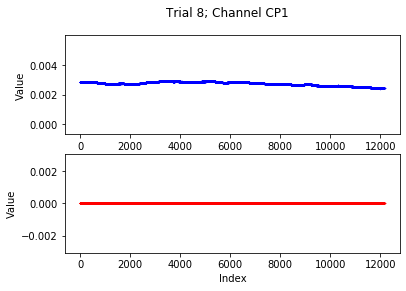

ca [-0.01595408 -0.01595455 -0.01595254 ... -0.01557899 -0.01558301
 -0.01558349]
cd [-4.3839648e-07  4.6043954e-07 -5.1186657e-07 ... -5.7121426e-08
  1.4526464e-08  4.8989278e-07]


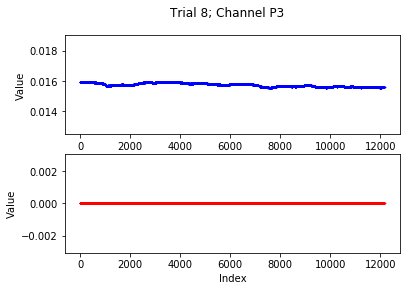

ca [-0.01653256 -0.01653532 -0.01654121 ... -0.01656903 -0.01656705
 -0.0165662 ]
cd [ 5.2757582e-07 -8.0006123e-07 -1.5538781e-06 ...  1.9546889e-08
  1.1780786e-06 -1.3123431e-06]


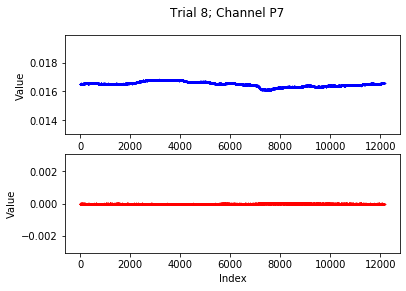

ca [-0.02825659 -0.02826897 -0.02825644 ... -0.02828857 -0.02829278
 -0.02829421]
cd [ 1.5344767e-06 -9.1393463e-07 -9.6548024e-07 ... -4.3009081e-07
 -1.8494595e-07  7.3625876e-07]


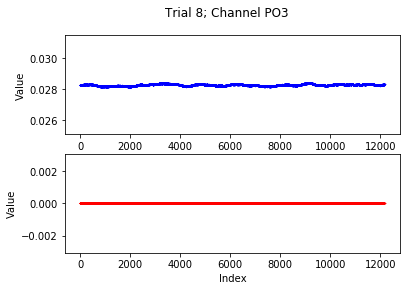

ca [-0.01734457 -0.01734289 -0.01734361 ... -0.01745207 -0.01745619
 -0.01745593]
cd [-1.3766182e-06  1.1552709e-06 -1.4506185e-06 ...  8.5495390e-07
 -1.4703885e-07 -5.4552777e-07]


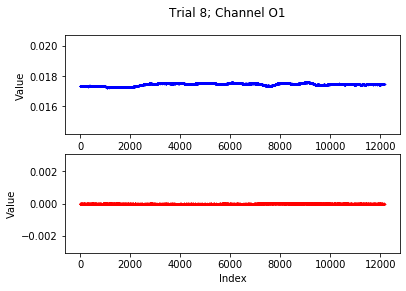

ca [-0.01644145 -0.01644071 -0.0164423  ... -0.01633088 -0.01633439
 -0.01633644]
cd [-5.7283108e-07  5.8641604e-07 -6.6912855e-07 ...  6.1461719e-07
 -5.2665871e-07  2.1433436e-07]


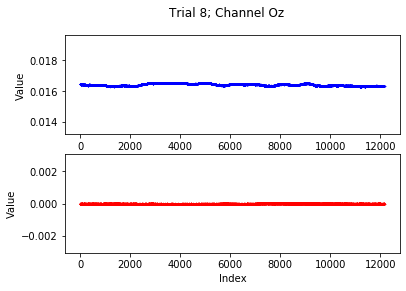

ca [-0.0217176  -0.02171726 -0.02171205 ... -0.02205579 -0.02204656
 -0.02204626]
cd [-4.8674889e-07  7.6511787e-07 -8.8301573e-07 ... -1.0372834e-07
  2.1733500e-07 -2.5174757e-07]


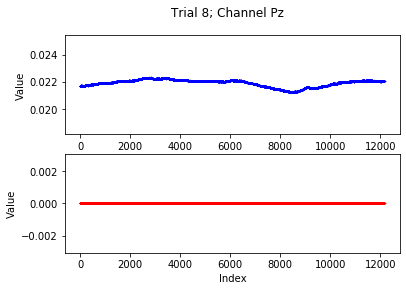

ca [-0.0071236  -0.00712923 -0.0071168  ... -0.00711574 -0.0071117
 -0.00711053]
cd [ 2.4089400e-06 -6.0423810e-07  4.2471299e-08 ...  5.6619666e-07
 -4.1359004e-07 -1.6643506e-07]


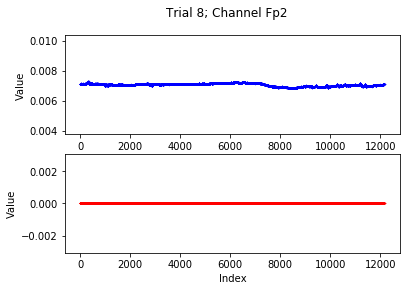

ca [-0.01480099 -0.01480543 -0.01479632 ... -0.01448504 -0.01448584
 -0.0144849 ]
cd [ 1.7260234e-06 -3.2584813e-07  4.9543701e-07 ...  4.7557816e-07
  2.8036567e-07 -7.9670122e-07]


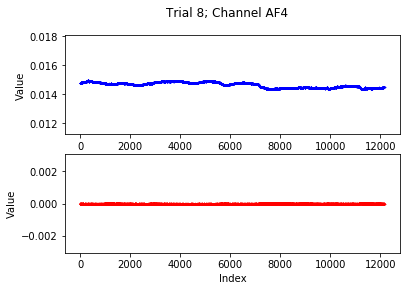

ca [-0.0058256  -0.00582952 -0.00581849 ... -0.0057161  -0.00572035
 -0.00572134]
cd [ 9.6288784e-07 -9.7104326e-08  1.0083063e-07 ... -1.2381819e-06
  1.7831803e-06 -7.4649597e-07]


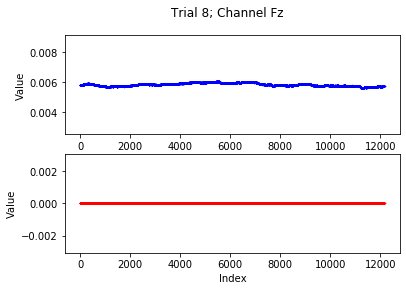

ca [0.00450024 0.00449947 0.00450957 ... 0.00480229 0.00480536 0.00480647]
cd [ 6.9026822e-07  2.5482331e-07 -3.6908824e-07 ... -5.0892351e-07
 -1.3924733e-07  3.6322987e-08]


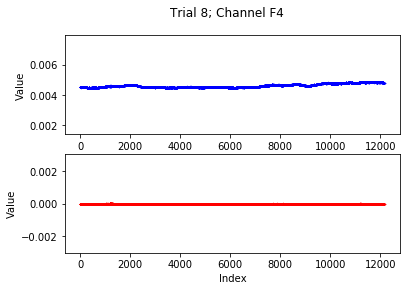

ca [-0.03106033 -0.03105869 -0.03105389 ... -0.03071593 -0.03071986
 -0.03072124]
cd [ 1.0369898e-06  2.8456500e-07 -1.0391018e-06 ...  1.6983654e-07
 -5.5813814e-07  1.2878411e-06]


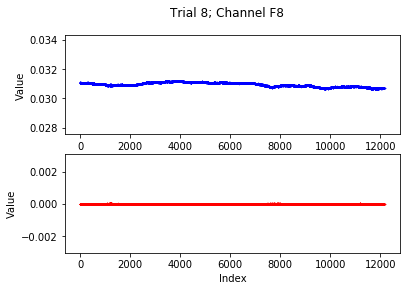

ca [-0.01988431 -0.01988402 -0.01987849 ... -0.01954222 -0.01954002
 -0.01953986]
cd [ 4.2267021e-07  3.9262619e-07 -6.7365261e-07 ... -3.4812749e-07
  3.8058710e-07 -2.9388116e-07]


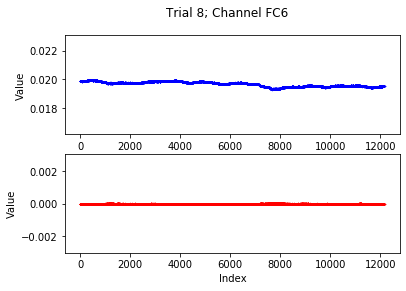

ca [0.01411824 0.01411652 0.01412224 ... 0.01435054 0.0143516  0.01435039]
cd [ 2.8296188e-07  4.3764220e-07 -7.1188097e-08 ... -1.2116079e-06
  1.8055715e-06 -6.2710672e-07]


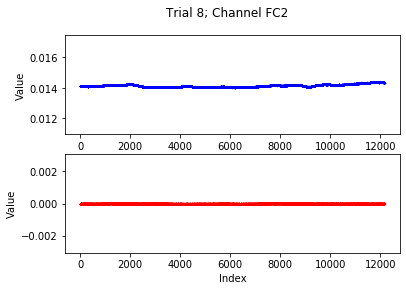

ca [0.00613558 0.00613309 0.00613602 ... 0.00678921 0.00678659 0.00678443]
cd [ 1.3564986e-07  3.3713786e-07  5.0379541e-09 ... -1.3307475e-06
  9.7328666e-07  3.2272834e-07]


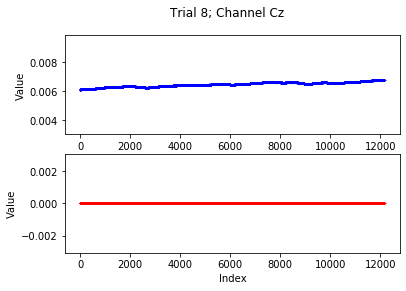

ca [-0.0142084  -0.01421051 -0.01420523 ... -0.01373956 -0.01373559
 -0.01373547]
cd [-3.8075811e-08  7.3602774e-07 -2.3468677e-07 ... -1.2599064e-06
  1.4099671e-06 -2.1291879e-07]


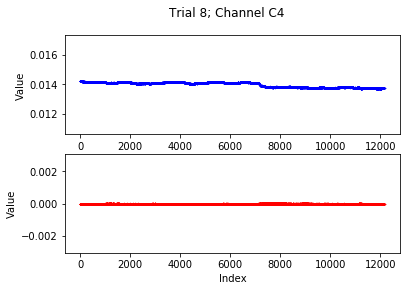

ca [-0.02391868 -0.02392109 -0.02391624 ... -0.02371818 -0.02371915
 -0.0237266 ]
cd [ 1.1023675e-06 -5.6865787e-08  1.3169997e-06 ...  3.9629913e-07
 -3.4936630e-07 -9.4758821e-07]


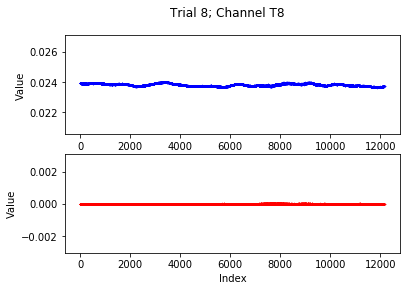

ca [-0.01338911 -0.01338415 -0.01337952 ... -0.01291091 -0.01291142
 -0.01290958]
cd [-5.3703798e-07  1.2412387e-06 -6.5003803e-08 ...  7.8729761e-07
 -6.0990891e-07 -2.7339701e-07]


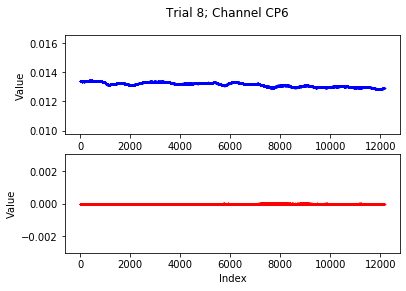

ca [-0.00791204 -0.00791335 -0.00790902 ... -0.00748724 -0.0074855
 -0.00748638]
cd [ 8.7747864e-08  3.5016109e-07 -3.1778035e-07 ... -1.6846303e-07
 -7.1417139e-07  5.9932393e-07]


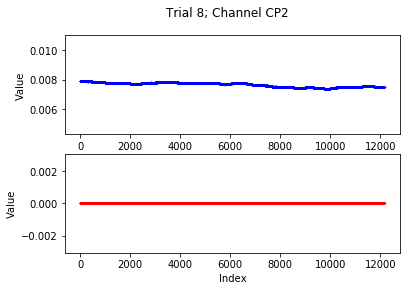

ca [-0.01409196 -0.01408994 -0.01408361 ... -0.01387962 -0.01388415
 -0.01388469]
cd [-2.0969816e-07  6.9862341e-07 -2.4660250e-07 ... -2.5909102e-08
  1.6956968e-06 -4.6142992e-07]


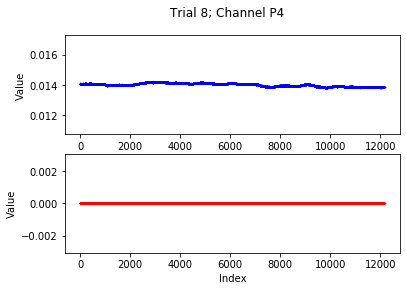

ca [-0.0216977  -0.02169089 -0.02167695 ... -0.0219104  -0.02191349
 -0.02191879]
cd [ 7.1042632e-07  2.5533754e-07 -4.1885590e-07 ...  3.3476164e-07
 -1.6996328e-06  9.3655109e-07]


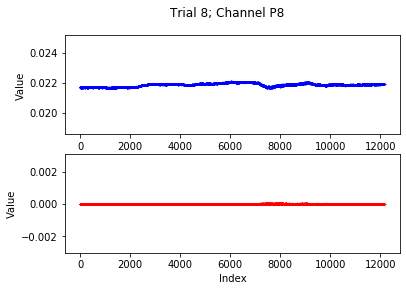

ca [-0.00768213 -0.00768498 -0.0076808  ... -0.00760096 -0.00759805
 -0.0075981 ]
cd [-2.2084429e-08  5.0704091e-07 -6.1294361e-07 ... -3.8964967e-07
  6.8628452e-08 -4.8496230e-07]


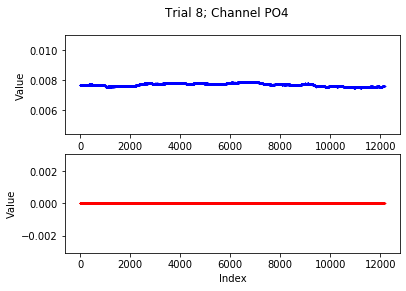

ca [-0.01799685 -0.01799847 -0.01799666 ... -0.01798055 -0.01798706
 -0.01798529]
cd [-1.1214766e-07  6.3159445e-07 -3.8455670e-07 ...  2.5954371e-06
 -1.2933551e-06  7.3261697e-07]


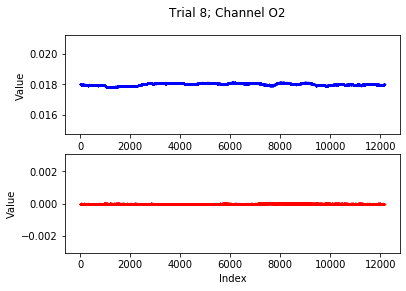

ca [-0.01881922 -0.01882632 -0.01881869 ... -0.018262   -0.01825014
 -0.01824711]
cd [ 1.4590617e-06 -1.1428468e-06 -3.7140745e-07 ...  4.4947299e-08
  1.6952383e-07 -1.2853988e-06]


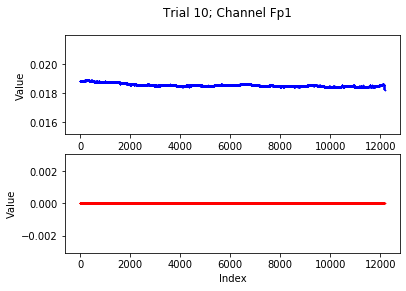

ca [-0.01119459 -0.01119855 -0.01119408 ... -0.01062234 -0.01061877
 -0.01061853]
cd [-2.87765033e-07  3.81740819e-07 -5.93450466e-07 ...  3.55255537e-07
  1.59021212e-07  1.07774234e-07]


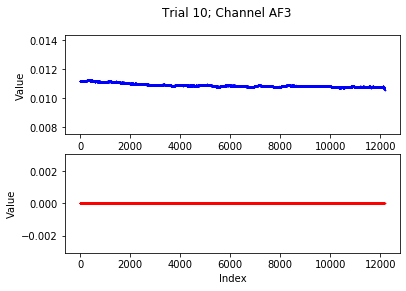

ca [-0.00979626 -0.00980267 -0.00979978 ... -0.00959184 -0.00958795
 -0.00958659]
cd [ 3.7239431e-07 -3.1155986e-07 -5.1181860e-07 ...  4.3216509e-08
 -2.7266495e-07  1.6585003e-07]


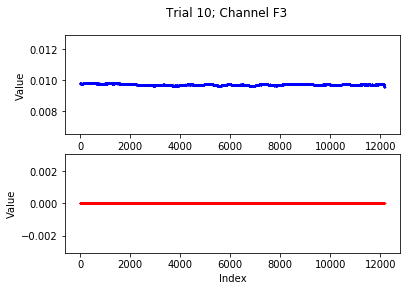

ca [-0.03048238 -0.03048182 -0.03048073 ... -0.0293295  -0.0293109
 -0.02930927]
cd [-1.0057272e-06  7.7873585e-07 -7.2351554e-07 ...  1.1917834e-07
  5.1383427e-07  3.7233704e-07]


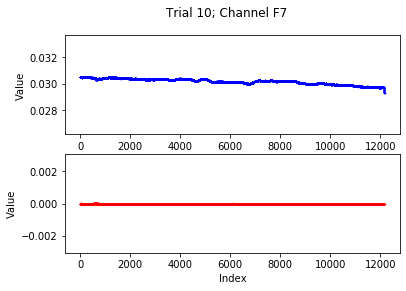

ca [0.01565297 0.01564898 0.01564832 ... 0.01571475 0.01570819 0.01570672]
cd [ 8.8547239e-08 -3.5190493e-07  4.1159197e-08 ... -2.9530906e-07
  7.4721794e-07 -1.0663426e-06]


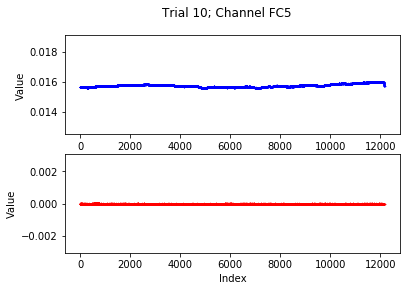

ca [0.00183156 0.00182845 0.00182933 ... 0.00177003 0.00176878 0.00176879]
cd [ 2.5113815e-07 -1.1722854e-07 -3.0801189e-07 ... -3.8056950e-07
  2.6270286e-07 -5.6829009e-07]


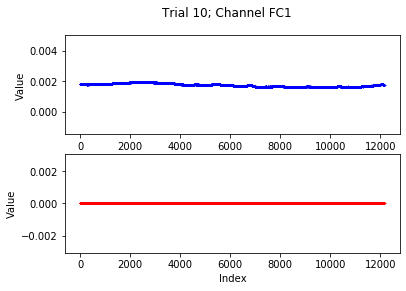

ca [-0.01110283 -0.01110426 -0.01110379 ... -0.01056924 -0.01056847
 -0.01056877]
cd [-2.3157924e-07  1.5532991e-07 -2.4284768e-07 ... -5.0074408e-07
  3.0816398e-07 -2.6411774e-07]


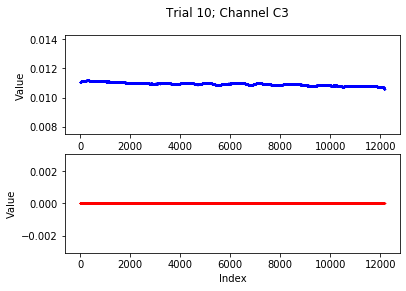

ca [-0.02635906 -0.02635227 -0.02635698 ... -0.02621663 -0.0262118
 -0.02621183]
cd [ 1.07946306e-07 -1.12742475e-06 -9.19992260e-08 ...  1.37142422e-06
 -5.94117296e-07 -8.41456085e-07]


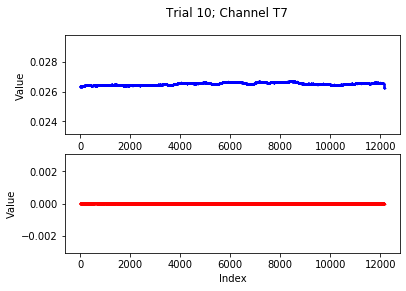

ca [-0.01513862 -0.01514015 -0.01513858 ... -0.01474347 -0.01474165
 -0.01474305]
cd [ 1.5009468e-07 -3.2169490e-07  1.9059208e-07 ...  3.6932153e-07
 -5.7550415e-07  7.7912290e-07]


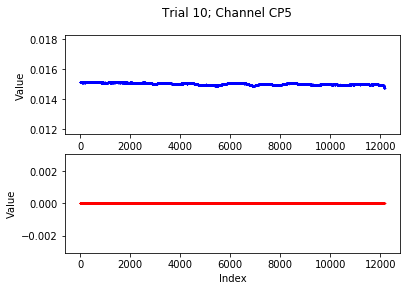

ca [-0.00242419 -0.0024271  -0.00242669 ... -0.00151715 -0.00151693
 -0.00151724]
cd [-2.8229485e-07  2.6207286e-07 -5.8279710e-07 ...  1.5109272e-07
 -1.4914707e-07  5.4529448e-08]


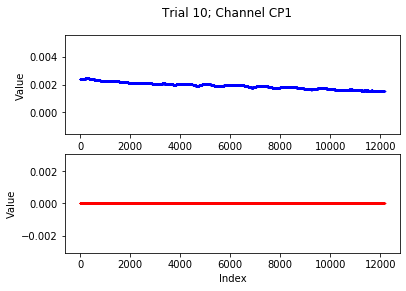

ca [-0.01560363 -0.01560589 -0.01560247 ... -0.01468059 -0.01467642
 -0.01467556]
cd [-6.7231048e-07  7.4320201e-07 -3.6455117e-07 ...  1.4551142e-07
 -9.2675194e-08 -4.5684124e-07]


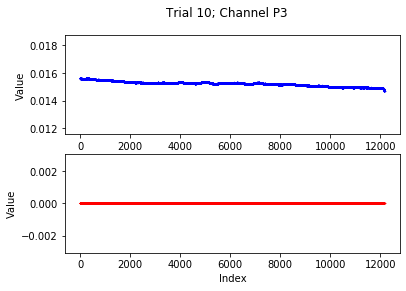

ca [-0.01652139 -0.01651965 -0.01651438 ... -0.01615866 -0.01616515
 -0.0161681 ]
cd [-1.0367927e-06  9.7172983e-07 -1.2783926e-06 ... -2.9398095e-07
 -2.6703509e-07  9.7086036e-07]


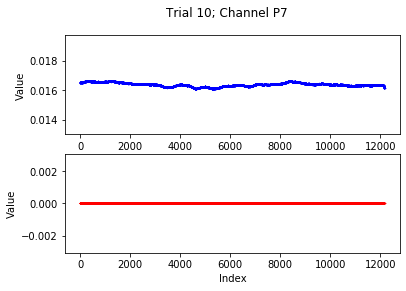

ca [-0.02825178 -0.02826331 -0.02825262 ... -0.02728726 -0.02729812
 -0.02729614]
cd [ 5.8042684e-07  2.9513467e-07 -6.0755190e-07 ...  5.2556072e-07
  1.5315679e-06 -2.5407712e-06]


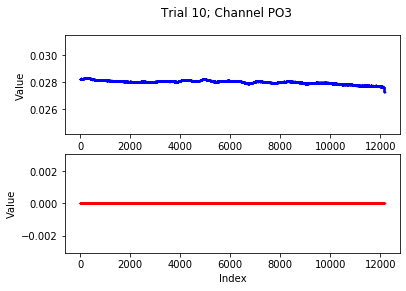

ca [-0.01745657 -0.01745524 -0.01745735 ... -0.01689069 -0.01689147
 -0.01689233]
cd [-2.1316257e-06  2.1185144e-06 -1.1329122e-07 ...  2.8577347e-07
  6.1838460e-07  2.6680812e-07]


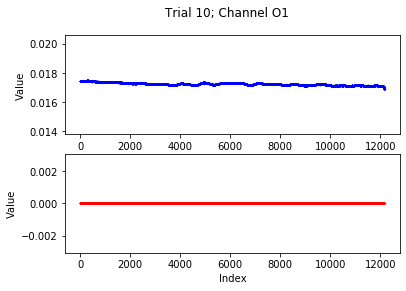

ca [-0.01634366 -0.01634124 -0.01633788 ... -0.0156982  -0.01569001
 -0.01569131]
cd [-1.8663147e-06  1.9536142e-06 -2.3903766e-08 ...  8.1990788e-07
 -1.3201871e-07 -6.9872874e-07]


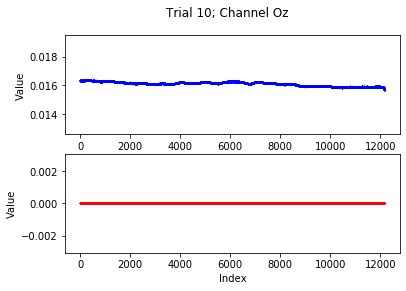

ca [-0.02205661 -0.02206063 -0.0220609  ... -0.02103106 -0.0210217
 -0.02102154]
cd [-1.5822046e-07  5.6665010e-07 -7.8519747e-07 ... -6.9577510e-07
 -1.4858595e-07 -1.5104933e-07]


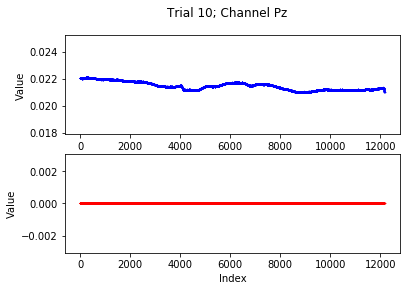

ca [-0.00705222 -0.00705486 -0.00703381 ... -0.00677696 -0.00677094
 -0.00677152]
cd [-5.4231159e-06  5.6448507e-06 -2.9892033e-06 ...  2.4618228e-07
 -2.3552124e-07 -1.2355529e-06]


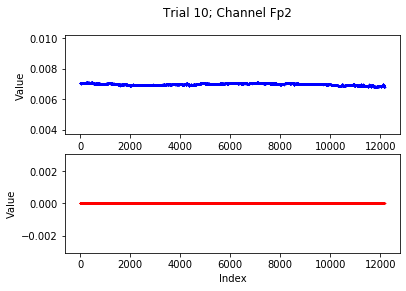

ca [-0.0144555  -0.01445846 -0.01445366 ... -0.0138323  -0.01382609
 -0.0138254 ]
cd [-5.7650857e-07  8.4647598e-07 -6.3754328e-07 ... -5.9676950e-08
  3.5465604e-09  1.5865930e-06]


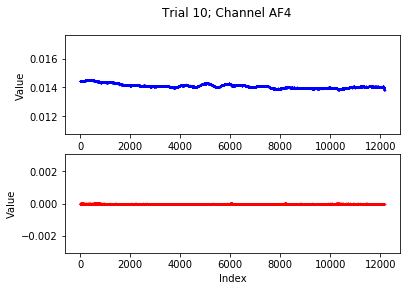

ca [-0.00571836 -0.00572467 -0.00571598 ... -0.00547791 -0.00547605
 -0.00547609]
cd [ 2.7186417e-08  4.0324815e-07 -2.3610492e-07 ... -6.2873295e-07
  3.1245170e-07 -1.1236391e-06]


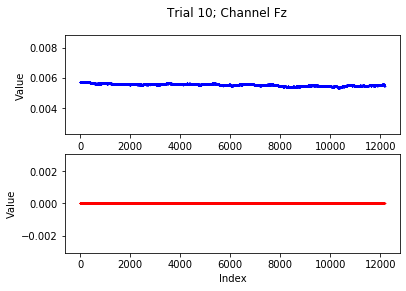

ca [0.00482884 0.00482473 0.00483142 ... 0.00506753 0.00506251 0.00506033]
cd [-3.4552676e-07  2.7044811e-07 -5.4929649e-07 ... -8.9911163e-07
  1.9054779e-06 -1.1929397e-06]


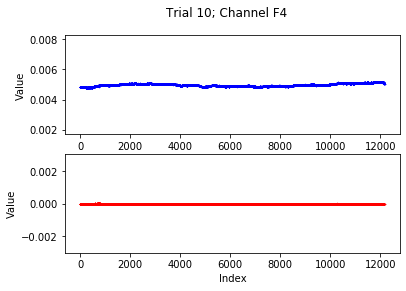

ca [-0.0306705  -0.03067287 -0.03066649 ... -0.02891979 -0.02890761
 -0.02890274]
cd [-3.1773970e-07  4.5809702e-07 -1.2418459e-06 ...  1.5917358e-06
 -7.0856242e-07  2.9097563e-07]


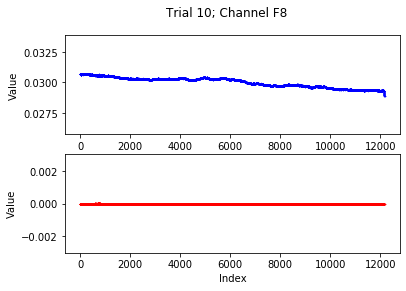

ca [-0.01949013 -0.01949071 -0.01948256 ... -0.01862142 -0.01862077
 -0.01861853]
cd [-1.5843679e-06  1.3776599e-06 -3.1872958e-07 ... -5.5870777e-07
  2.7434186e-07  4.2881635e-07]


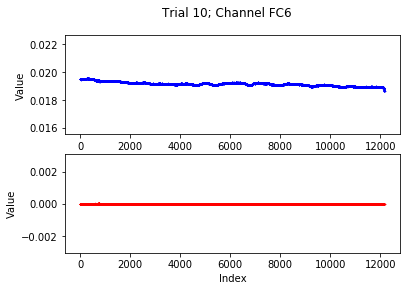

ca [0.01437114 0.01436617 0.01437365 ... 0.01445667 0.01445291 0.01445232]
cd [-3.0460205e-07  5.8357386e-07 -3.9239956e-07 ... -1.0098198e-06
  7.7129954e-07 -6.1683784e-07]


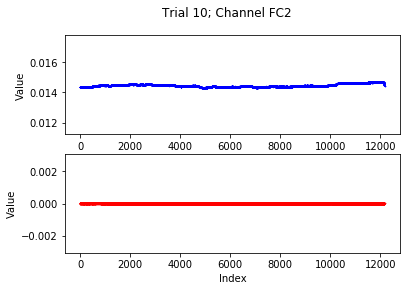

ca [0.00678683 0.00678171 0.00678764 ... 0.00760961 0.00760455 0.00760453]
cd [ 6.77112894e-07 -2.67084829e-07 -1.24026997e-07 ... -1.09746594e-07
  2.19231168e-07 -3.92293828e-07]


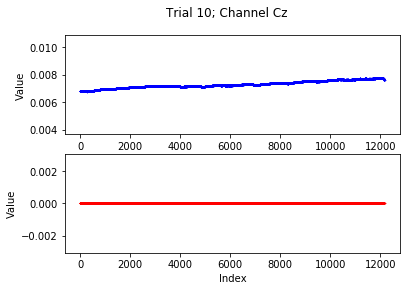

ca [-0.01371536 -0.0137199  -0.01371156 ... -0.01307847 -0.01307539
 -0.01307592]
cd [-1.0429555e-06  1.4166793e-06 -2.9912962e-07 ... -7.1874481e-08
  2.2445083e-07  2.8783421e-07]


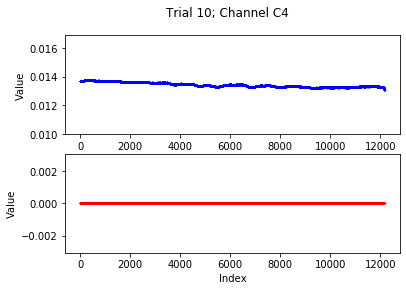

ca [-0.02367822 -0.02368082 -0.02367952 ... -0.02295874 -0.0229596
 -0.02296137]
cd [-3.9506594e-06  4.2925908e-06 -1.7557334e-06 ... -1.1971945e-06
  6.9877342e-07  6.3330288e-07]


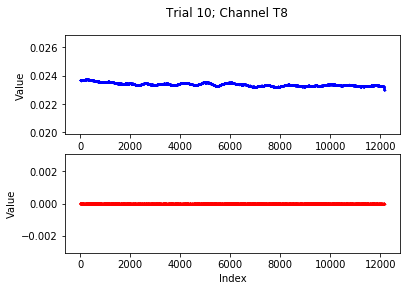

ca [-0.01286383 -0.01286673 -0.01286145 ... -0.01202078 -0.01202039
 -0.0120191 ]
cd [-1.7463055e-06  2.6125808e-06 -8.8853199e-08 ...  3.3376318e-07
 -2.3181313e-07 -1.0974063e-07]


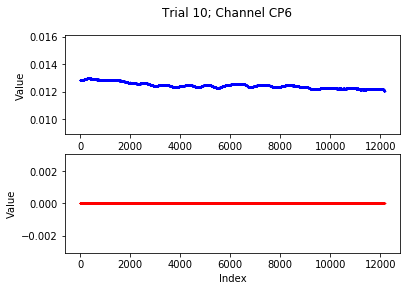

ca [-0.00749731 -0.00750246 -0.00749745 ... -0.00663793 -0.00663901
 -0.00663819]
cd [-1.9366574e-07  6.5187339e-07  3.0864283e-07 ... -2.2755601e-07
  3.1457222e-07 -3.9347168e-07]


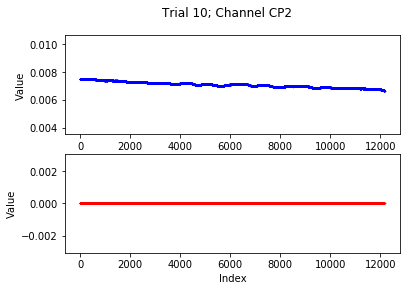

ca [-0.01387358 -0.01387795 -0.01387299 ... -0.01320021 -0.01319852
 -0.0131991 ]
cd [-5.1599909e-07  1.1662870e-06  8.8675819e-08 ...  2.4493153e-07
  7.2687783e-07 -6.9955018e-07]


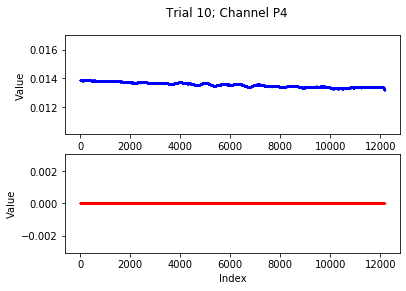

ca [-0.02190527 -0.02190669 -0.02189825 ... -0.02140741 -0.0214002
 -0.02140272]
cd [-3.3793933e-06  4.8283350e-06 -4.0491287e-08 ...  9.1708458e-08
 -3.6355348e-07  5.4335283e-07]


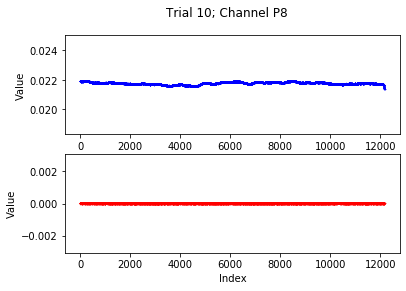

ca [-0.00757386 -0.00758042 -0.00757137 ... -0.00733708 -0.00733212
 -0.00733093]
cd [-4.4384558e-07  8.2183544e-07  3.7390279e-07 ...  5.5998322e-07
 -1.0385176e-07 -7.0462454e-07]


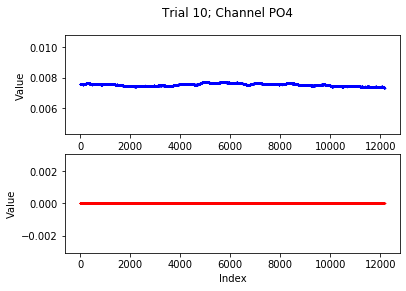

ca [-0.01797646 -0.01798219 -0.01797262 ... -0.0173537  -0.01735257
 -0.01734843]
cd [-3.7875367e-08  4.0858106e-07  4.4961257e-07 ...  9.9297961e-07
 -4.0761705e-07 -3.8730900e-07]


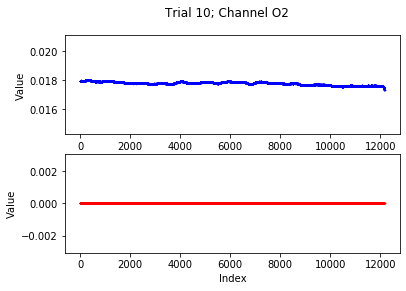

In [5]:
plot_dwts(False)